# Project Team ID : PTID-CDS-DEC-23-1729
# Batch : 28th Aug & 3rd July - CDS

# Project : PRCL-0012 

## Business case :
#### ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade. On an average ABC Tech receives 22-25k IT incidents/tickets , which were handled to best practice ITIL framework with incident management , problem management, change management and configuration management processes. These ITIL practices attained matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment.

## Problem Statement 

#### ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.

## Tasks

**Task 1:-** Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

**Task 2 :-** Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

**Task 3:-** Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

**Task 4 :-** Predict RFC (Request for change) and possible failure /
misconfiguration of ITSM assets.

## Installing Packages

In [1]:
!pip install pymysql
!pip install mysql-connector

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Importing Libraries

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Fetching Data

In [2]:
connection = mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team',
                                  password='DM!$Team@&27920!',
                                   database= "project_itsm")

In [3]:
pd.read_sql_query("show tables",connection)

,Tables_in_project_itsm
0,dataset_list


In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
data = pd.read_sql_query("select * from dataset_list",connection)

## Domain Analysis

This Dataset contain Total of 24 features and 1 Target(Priority)

1) CI_Name: Represents the Configuration Item (CI) Name, which is an element of
the IT infrastructure that is managed in the context of IT Service Management.

2) CI_Cat: Denotes the category of the Configuration Item.

3) CI_Subcat: Specifies the subcategory of the Configuration Item. It provides more detailed information about the type of CI.

4) WBS: Stands for Work Breakdown Structure. It is a project management tool that represents a hierarchical decomposition of the total scope of work to be carried out by the project team.

5) Incident_ID: Unique identifier for each incident. It is a reference number or code assigned to each reported incident.

6) Status: Represents the current status of the incident.

7) Impact: Indicates the impact of the incident on the business or IT services.

8) Urgency: Reflects the urgency of addressing the incident.

9) Priority: Represents the overall priority assigned to the incident, which is often a combination of impact and urgency.

10) number_cnt: It's not explicitly described, but it may be a numerical count  associated with something in the dataset.

11) Category: Denotes the category of the incident, providing additional classification information.

12) KB_number: May refer to a Knowledge Base (KB) article number. Knowledge base articles are often used for documenting solutions to common issues.

13) Alert_Status: Represents the status of any alerts associated with the incident.

14) No_of_Reassignments: Indicates the number of times the incident has been reassigned or transferred to different support personnel or groups.

15) Open_Time: Represents the timestamp when the incident was initially reported or opened.

16) Reopen_Time: Timestamp indicating when the incident was reopened, if applicable.

17) Resolved_Time: Timestamp indicating when the incident was resolved or fixed.

18) Close_Time: Timestamp indicating when the incident was closed or marked as completed.

19) Handle_Time_hrs: Represents the time taken to handle or resolve the incident, often measured in hours.

20) Closure_Code: Denotes the code or reason for closing the incident.

21) No_of_Related_Interactions: Indicates the number of related interactions associated with the incident.

22) Related_Interaction: Information about the related interactions associated with the incident.

23) No_of_Related_Incidents: Represents the number of incidents related to the current incident.

24) No_of_Related_Changes: Indicates the number of related changes associated   with the incident.

25) Related_Change: Information about the related changes associated with the incident.

# Task 1:- Predicting High Priority Tickets

## Basic Checks

In [6]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [7]:
data.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3,0.902319509,incident,KM0000182,closed,0,31-03-2014 17:24,,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1,SD0147088,,,


In [8]:
data.shape

(46606, 25)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

** There are many columns that shows empty cells but is not showing as null values. So, we need to replace them wil NaN.

In [10]:
data=data.replace('',np.nan)
data=data.replace('NS',np.nan)
data=data.replace('NA',np.nan)

In [11]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NaN,3,NaN,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,NaN,NaN,NaN


** There are some columns that have numerical inputs but is showing object data type, and also there are few datetime column showing object data type. So we need to typecaste them.

In [12]:
numeric = ['Impact','Priority','number_cnt','No_of_Reassignments','No_of_Related_Interactions','No_of_Related_Incidents','Urgency','Handle_Time_hrs']
date_time = ['Open_Time','Reopen_Time','Resolved_Time','Close_Time']

In [13]:
data['Urgency'].unique()

array(['4', '3', '5', '2', '1', '5 - Very Low'], dtype=object)

In [14]:
data['Urgency']=data['Urgency'].replace('5 - Very Low','6')    # We replaced '5 - Very low to 6'

In [15]:
data['Handle_Time_hrs'] = data['Handle_Time_hrs'].apply(lambda x: int(''.join(str(x).split(','))) if pd.notna(x) else np.nan)

In [16]:
for i in numeric:
    data[i]=pd.to_numeric(data[i])

In [17]:
for i in date_time:
    data[i]=pd.to_datetime(data[i])

In [18]:
data.describe()

,Impact,Urgency,Priority,number_cnt,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions,No_of_Related_Incidents
count,45226.000000,46606.000000,45226.000000,46606.000000,46605.000000,4.660500e+04,46492.000000,1222.000000
mean,4.223632,4.189568,4.215805,0.499658,1.131831,2.399307e+09,1.149897,1.669394
std,0.705474,0.724784,0.705624,0.288634,2.269774,2.458999e+09,2.556338,3.339687
min,1.000000,1.000000,1.000000,0.000023,0.000000,0.000000e+00,1.000000,1.000000
25%,4.000000,4.000000,4.000000,0.248213,0.000000,4.313889e+08,1.000000,1.000000
50%,4.000000,4.000000,4.000000,0.500269,0.000000,1.583611e+09,1.000000,1.000000
75%,5.000000,5.000000,5.000000,0.749094,2.000000,3.583056e+09,1.000000,1.000000
max,5.000000,6.000000,5.000000,0.999997,46.000000,9.999722e+09,370.000000,63.000000


    ** There is no constant or Corrupt columns.

In [19]:
data.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Category,KB_number,Alert_Status,Closure_Code,Related_Interaction,No_of_Related_Changes,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46146,46606,560,560
unique,3019,12,64,274,46606,2,4,1825,1,14,43060,4,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,incident,KM0001106,closed,Other,#MULTIVALUE,1,C00003013
freq,3050,32900,18811,13342,1,46597,37748,1106,46606,16470,3434,536,110


**insights**
- There is one constant column named "Alert_Status".
- 'Incident_ID' column have all unique values.

Hence, we can drop these two columns.

In [21]:
data = data.drop(['Alert_Status','Incident_ID'],axis=1)

In [22]:
data.duplicated().sum()

0

## Exploratory Data Analysis

In [23]:
num_col = data.select_dtypes(exclude="object").columns.to_list()
obj_col = data.select_dtypes(include="object").columns.to_list()

#### Univariate Analysis

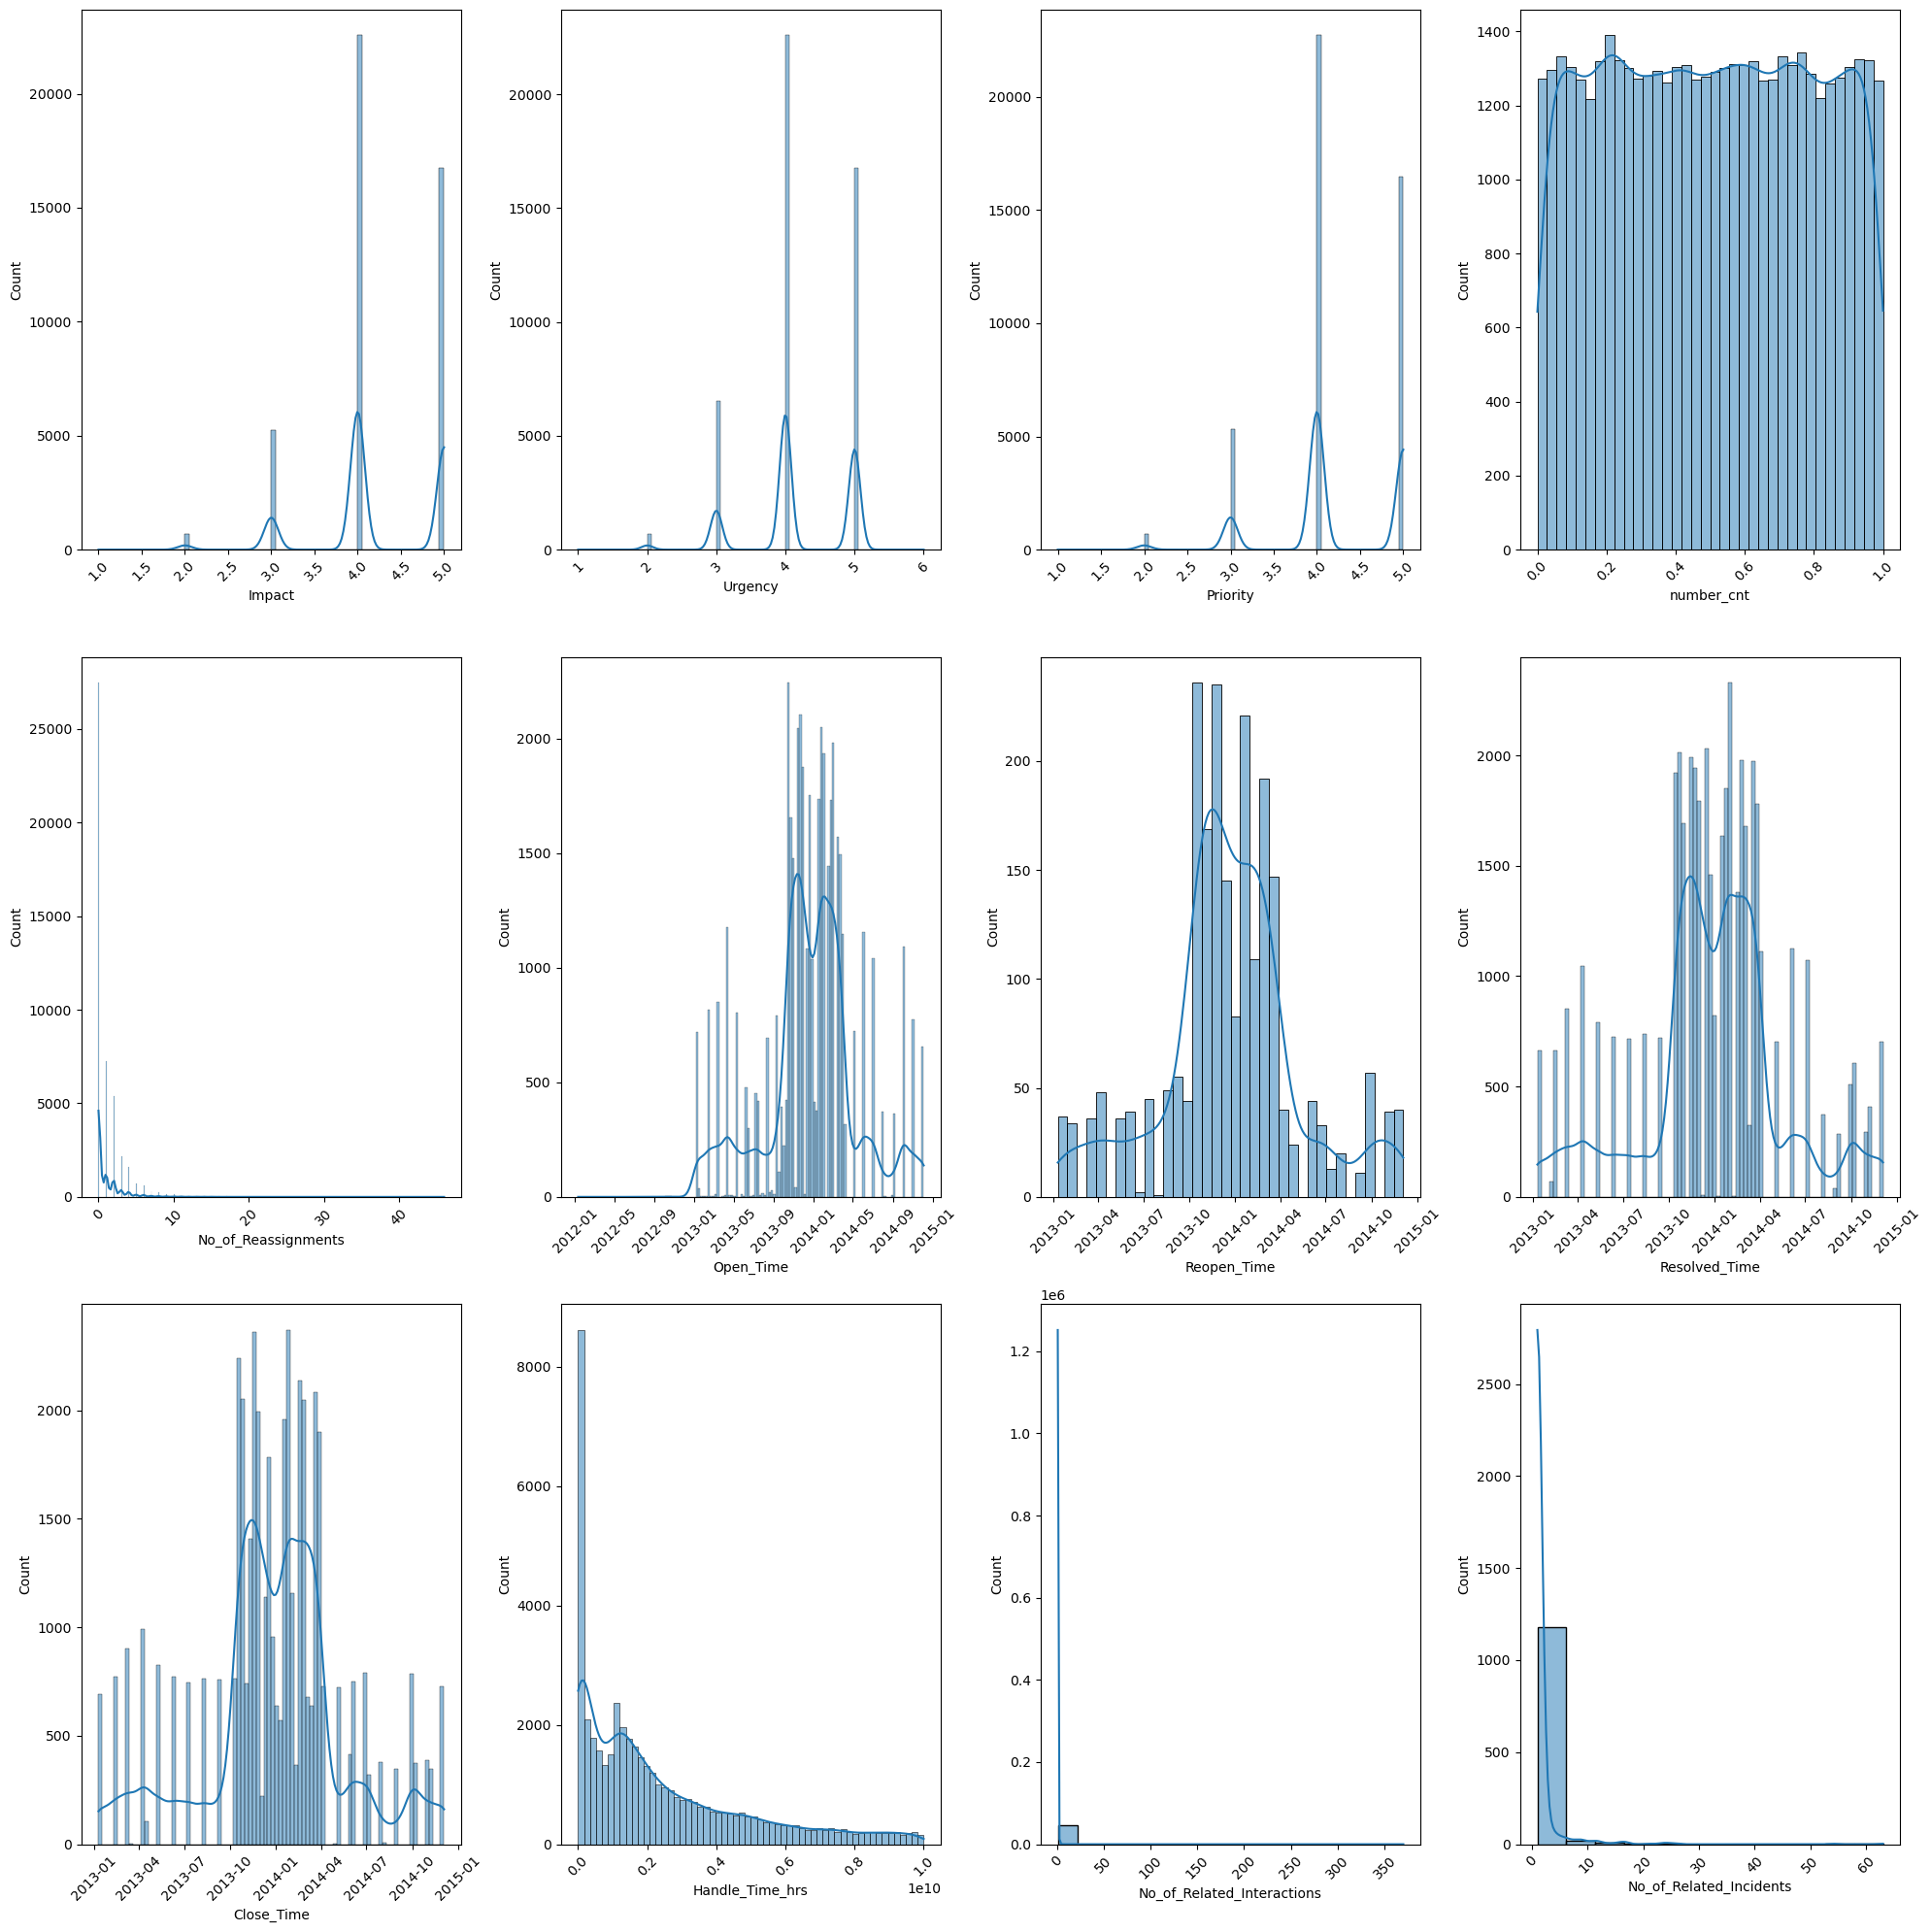

In [27]:
## Numerical Columns
plt.figure(figsize=(20,20))
plotnum=1
for i in num_col:
    plt.subplot(3,4,plotnum)
    sns.histplot(x=data[i],kde=True)
    plt.xlabel(i)
    plt.xticks(rotation = 45)
    plotnum+=1
plt.tight_layout()
plt.show()

    ** Data points of none of the above plotted columns are normally distributed. 

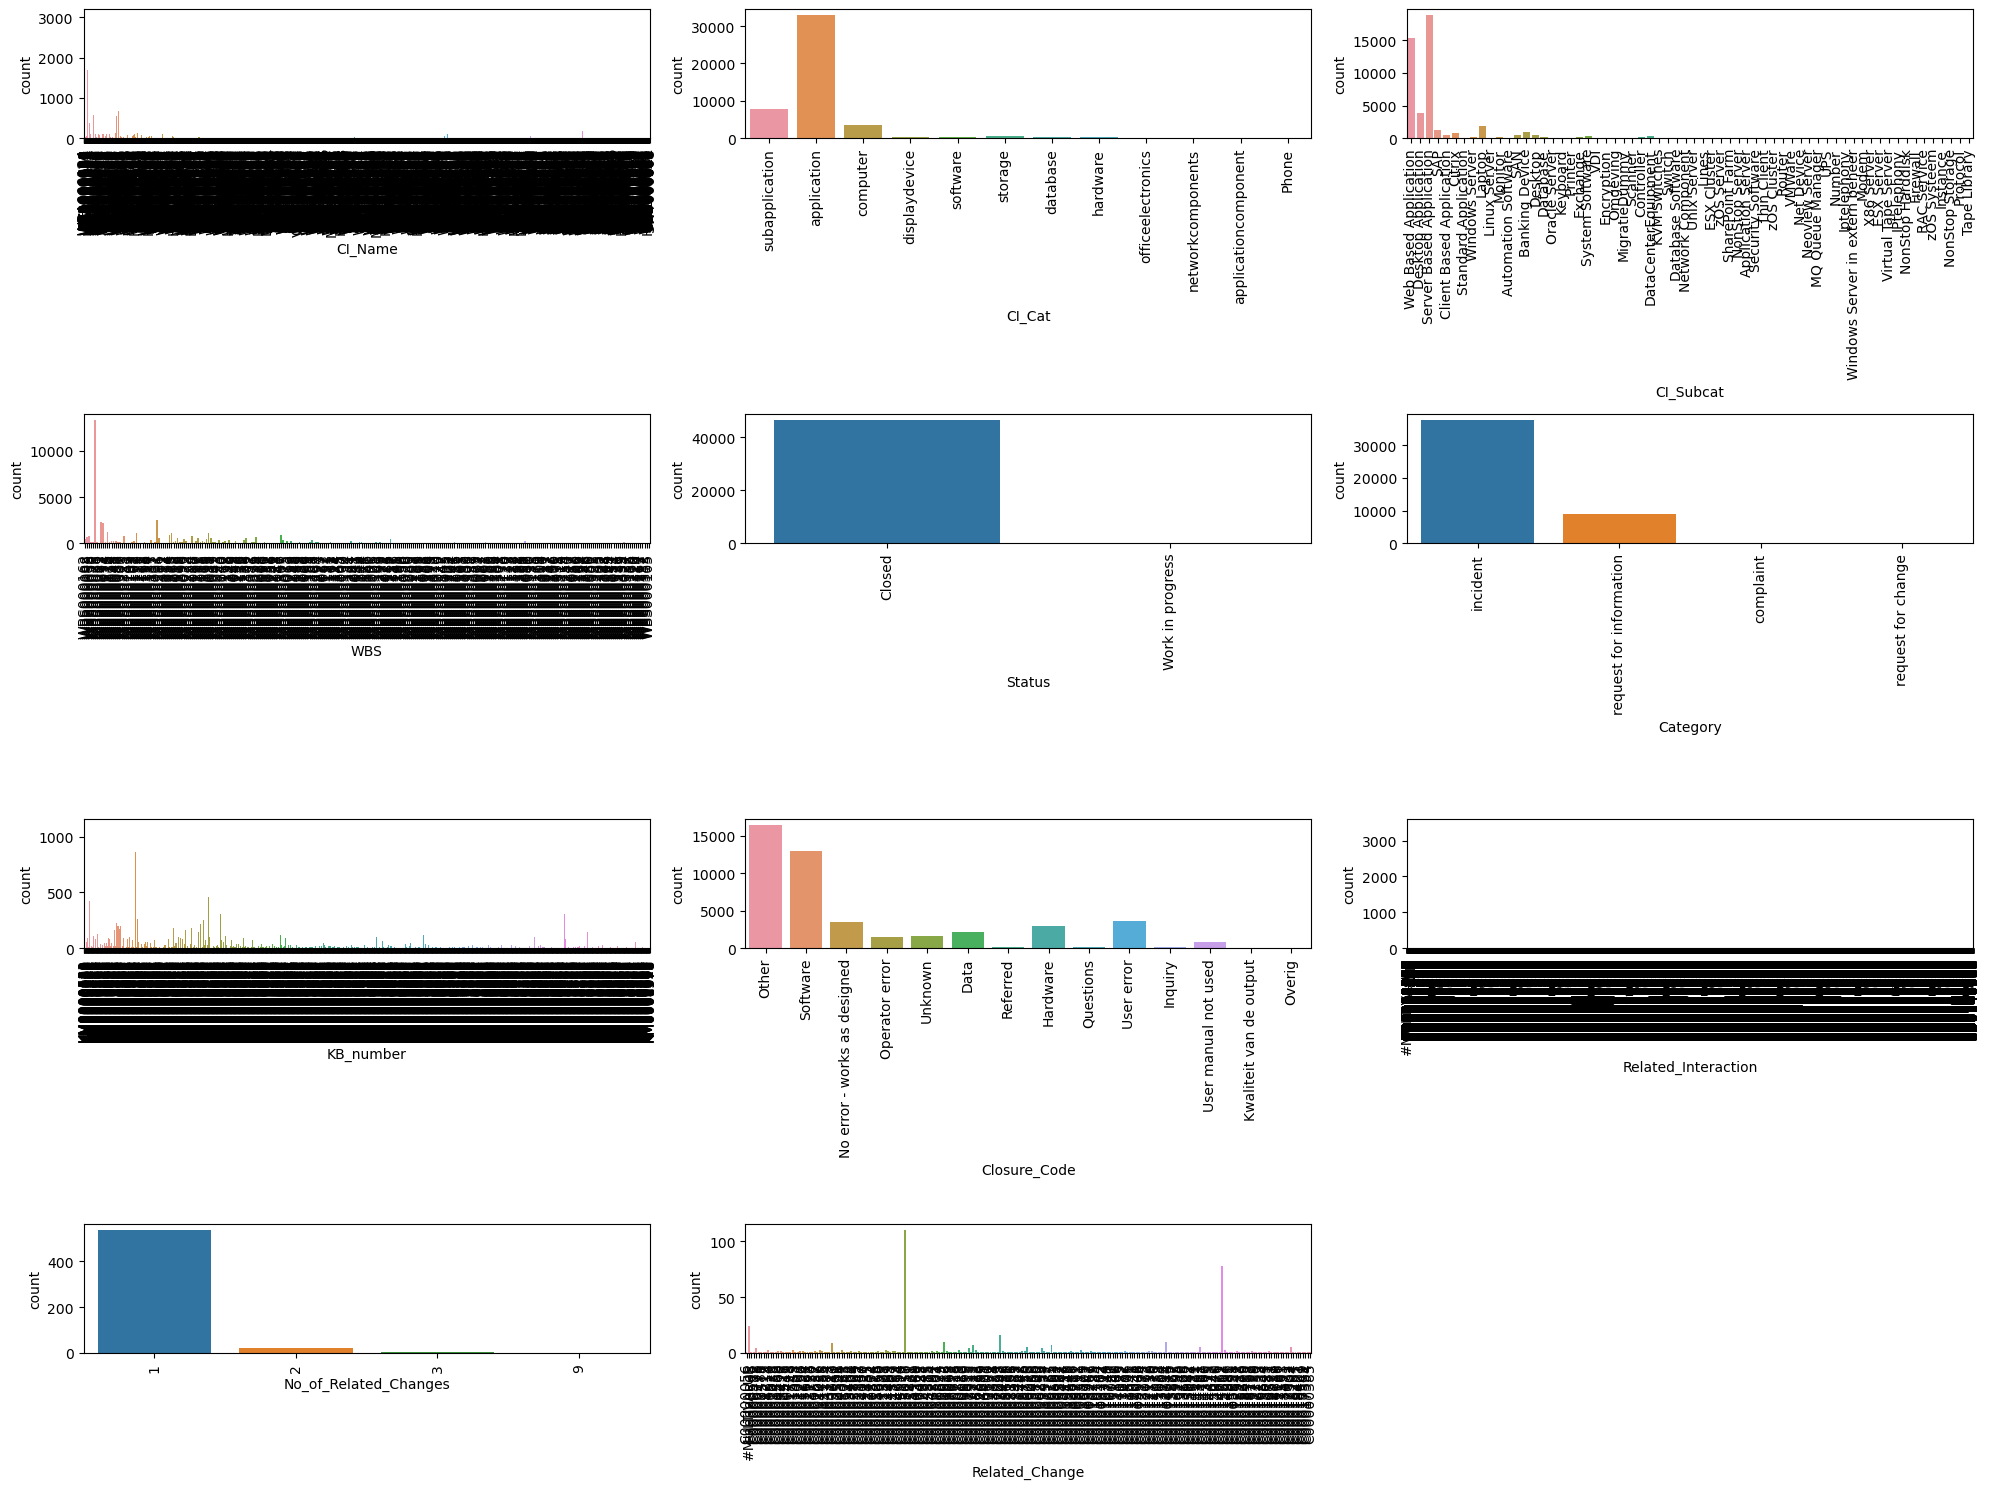

In [16]:
plt.figure(figsize=(20,15))
plotnum = 1
for i in obj_col:
    plt.subplot(4,3,plotnum)
    sns.countplot(x=data[i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plotnum += 1
plt.tight_layout()
plt.show()

### Insights




**CI_Cat , CI_Subcat** : 

        Max number of tickets are raised in the application category and under that server based application is showing the highest number of incident in the subcategory, followed by subapplication and computer respectively in categories.
        
**Status** :

        All the tickets raised in this datset is showing to be closed.
        
**Category :**

        Majority of the tickets raised are incident, whereas 10000 of them are regarding request for information.
        
**No_of_Related_Changes :**

        Majority of the tickets got 1 related changes.

#### Bivariate Analysis

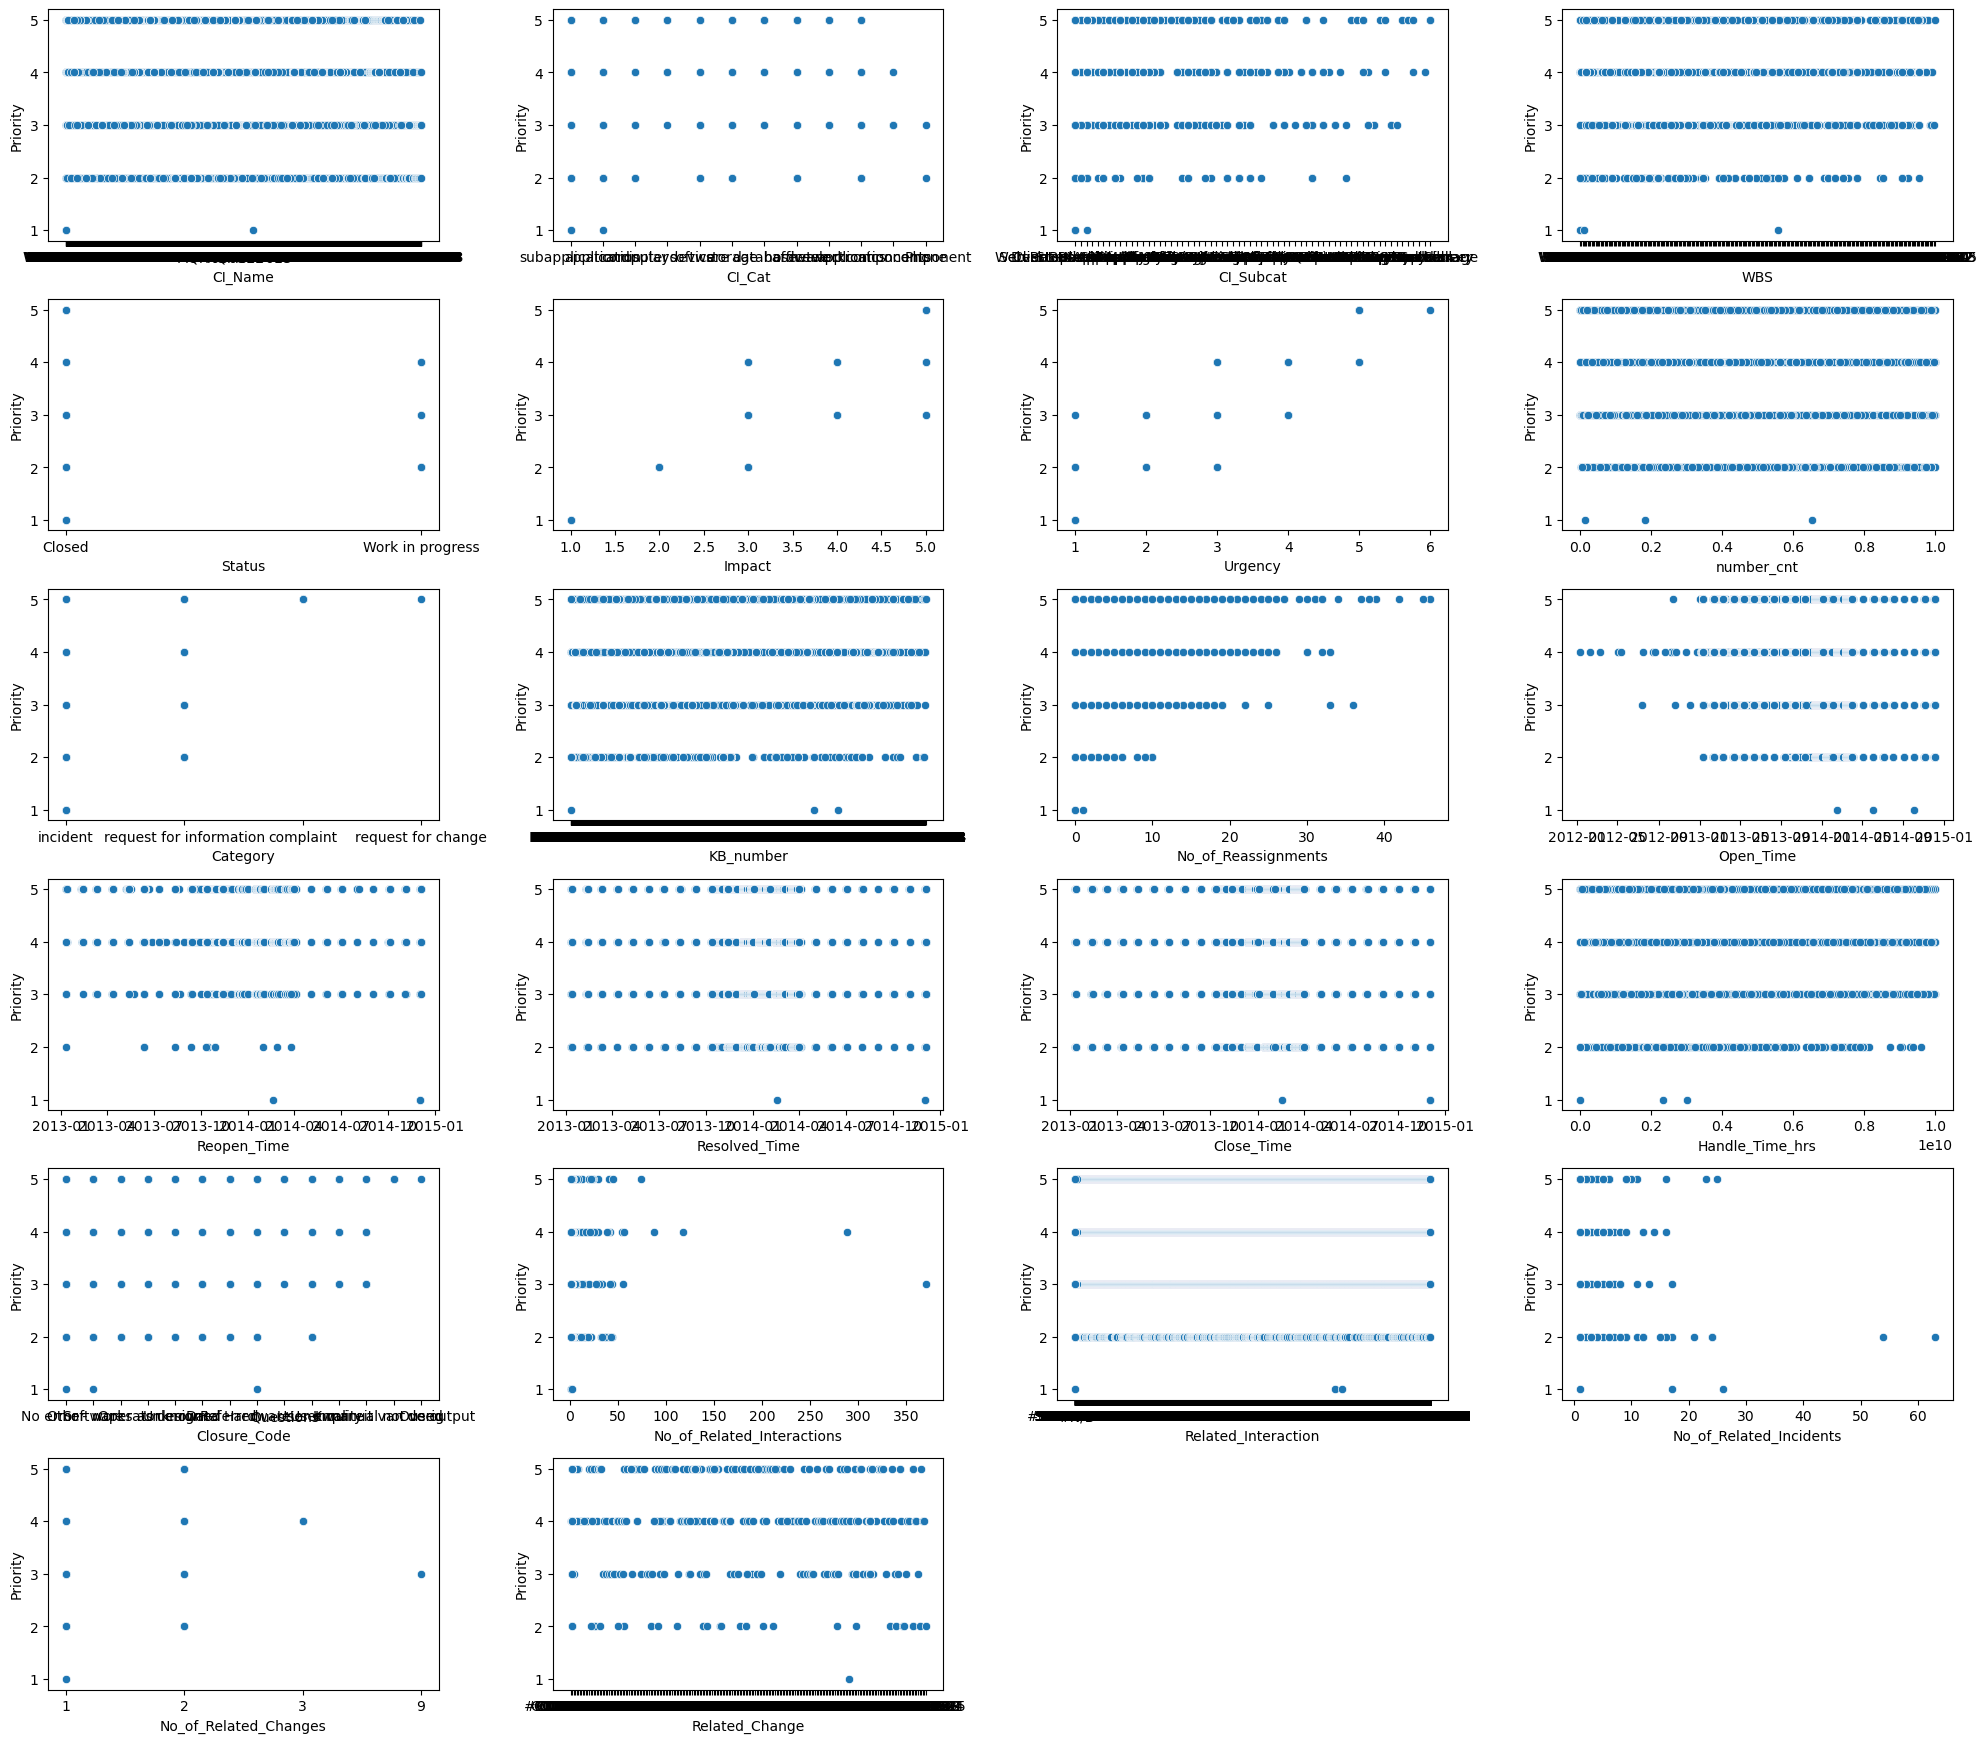

In [30]:
plt.figure(figsize=(20,20))
plotnum = 1
for i in data.drop('Priority',axis = 1).columns:
    plt.subplot(7,4,plotnum)
    sns.scatterplot(x=data[i],y=data['Priority'])
    plt.xlabel(i)
    plotnum += 1
plt.tight_layout()
plt.show()

    ** No correlation found.

## Data Preprocessing

#### Handling null values

In [24]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Status                            0
Impact                         1380
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

    ** There are few columns where nulls values is seen to be more than 80%, So we will drop those columns.

In [25]:
data = data.drop(['Related_Change','No_of_Related_Changes','No_of_Related_Incidents','Reopen_Time'],axis=1)

In [26]:
data.isnull().sum()

CI_Name                          0
CI_Cat                         111
CI_Subcat                      111
WBS                              0
Status                           0
Impact                        1380
Urgency                          0
Priority                      1380
number_cnt                       0
Category                         0
KB_number                        0
No_of_Reassignments              1
Open_Time                        0
Resolved_Time                 1780
Close_Time                       0
Handle_Time_hrs                  1
Closure_Code                   460
No_of_Related_Interactions     114
Related_Interaction              0
dtype: int64

In [27]:
for i in data.columns:
    if data[i].dtype == 'int64':
        data.loc[data[i].isnull()==True,i] = data[i].median()
    elif data[i].dtype == 'float64':
        data.loc[data[i].isnull()==True,i] = data[i].median()
    elif data[i].dtype == 'object':
        a= data[i].mode()
        b=a[0]
        data.loc[data[i].isnull()==True,i] =b

In [28]:
data.isnull().sum()

CI_Name                          0
CI_Cat                           0
CI_Subcat                        0
WBS                              0
Status                           0
Impact                           0
Urgency                          0
Priority                         0
number_cnt                       0
Category                         0
KB_number                        0
No_of_Reassignments              0
Open_Time                        0
Resolved_Time                 1780
Close_Time                       0
Handle_Time_hrs                  0
Closure_Code                     0
No_of_Related_Interactions       0
Related_Interaction              0
dtype: int64

#### Converting Categorical columns


In [29]:
obj_col

['CI_Name',
 'CI_Cat',
 'CI_Subcat',
 'WBS',
 'Status',
 'Category',
 'KB_number',
 'Closure_Code',
 'Related_Interaction',
 'No_of_Related_Changes',
 'Related_Change']

In [30]:
encod_col = ['CI_Cat','CI_Subcat','WBS','Status','Category','KB_number','Closure_Code','Related_Interaction']

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.CI_Cat = le.fit_transform(data.CI_Cat)
data.CI_Subcat = le.fit_transform(data.CI_Subcat)
data.WBS = le.fit_transform(data.WBS)
data.Status = le.fit_transform(data.Status)
data.Category = le.fit_transform(data.Category)
data.KB_number = le.fit_transform(data.KB_number)
data.Closure_Code = le.fit_transform(data.Closure_Code)
data.Related_Interaction = le.fit_transform(data.Related_Interaction)

In [32]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,SUB000508,11,57,137,0,4.0,4,4.0,0.601292,1,413,26.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,3.871691e+09,6,1.0,2
1,WBA000124,1,57,70,0,3.0,3,3.0,0.415050,1,456,33.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,4.354786e+09,10,1.0,3
2,DTA000024,1,10,74,0,4.0,3,4.0,0.517551,3,244,3.0,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,4.843119e+09,4,1.0,4
3,WBA000124,1,57,70,0,4.0,4,4.0,0.642927,1,456,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,4.321833e+09,5,1.0,5
4,WBA000124,1,57,70,0,4.0,4,4.0,0.345258,1,456,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,3.383903e+09,6,1.0,6


#### Handling Outliers

In [33]:
num_col

['Impact',
 'Urgency',
 'Priority',
 'number_cnt',
 'No_of_Reassignments',
 'Open_Time',
 'Reopen_Time',
 'Resolved_Time',
 'Close_Time',
 'Handle_Time_hrs',
 'No_of_Related_Interactions',
 'No_of_Related_Incidents']

In [34]:
num_col_out = ['number_cnt','No_of_Reassignments','Handle_Time_hrs','No_of_Related_Interactions']

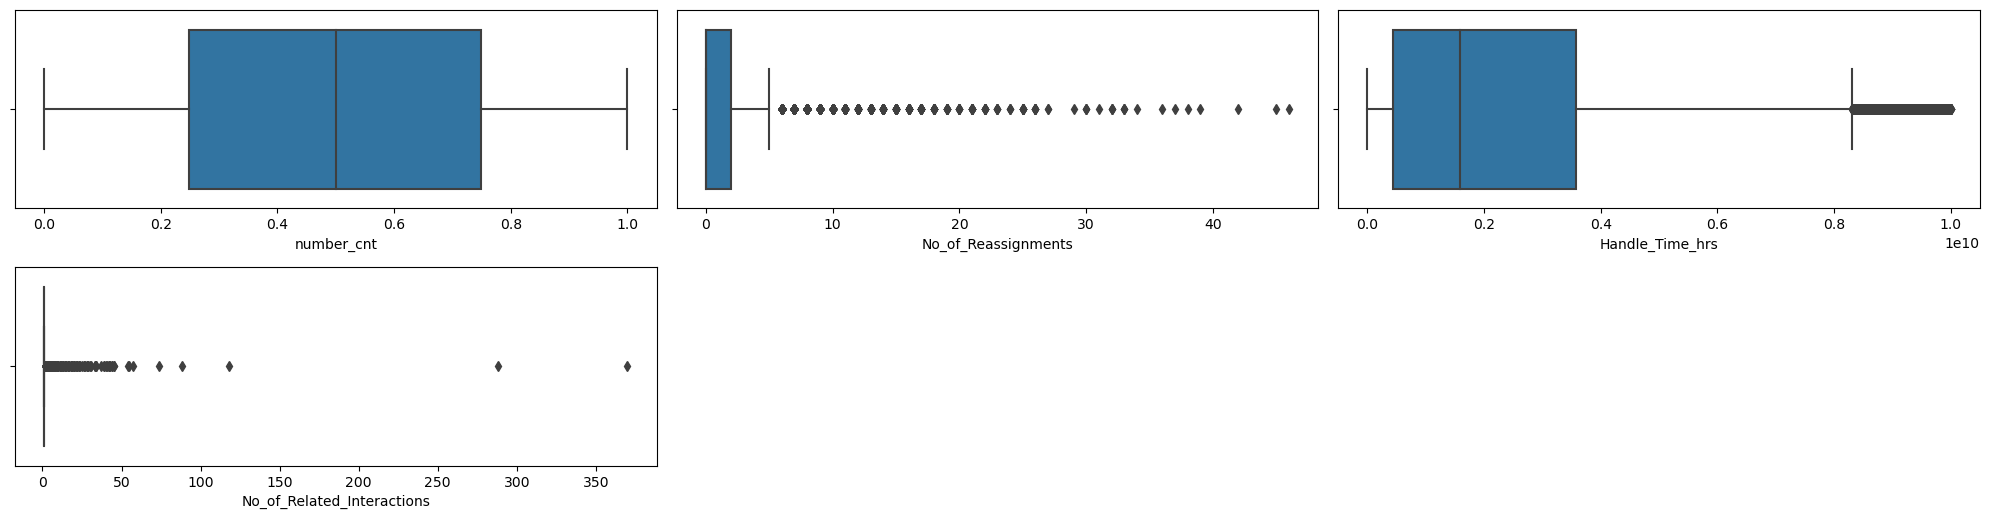

In [35]:
plt.figure(figsize=(20,10))
plotnum = 1
for i in num_col_out:
    plt.subplot(4,3,plotnum)
    sns.boxplot(x=data[i])
    plotnum += 1
    plt.xlabel(i)
plt.tight_layout()
plt.show()

In [36]:
# We will remove outliers manually for long range data points because in these features a large number of datapoints are lying above the upper range.
data.loc[data['No_of_Reassignments']>40,'No_of_Reassignments'] = np.median(data['No_of_Reassignments'])
data.loc[data['No_of_Related_Interactions']>100,'No_of_Related_Interactions'] = np.median(data['No_of_Related_Interactions'])

#### Scaling

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  object        
 1   CI_Cat                      46606 non-null  int32         
 2   CI_Subcat                   46606 non-null  int32         
 3   WBS                         46606 non-null  int32         
 4   Status                      46606 non-null  int32         
 5   Impact                      46606 non-null  float64       
 6   Urgency                     46606 non-null  int64         
 7   Priority                    46606 non-null  float64       
 8   number_cnt                  46606 non-null  float64       
 9   Category                    46606 non-null  int32         
 10  KB_number                   46606 non-null  int32         
 11  No_of_Reassignments         46606 non-null  float64   

In [38]:
scale_col = [ 'CI_Cat', 'CI_Subcat', 'WBS', 'Status', 
        'number_cnt', 'Category', 'KB_number',
       'No_of_Reassignments', 'Handle_Time_hrs', 'Closure_Code', 'No_of_Related_Interactions',
       'Related_Interaction']

In [39]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data[scale_col] = scale.fit_transform(data[scale_col])

## Feature Selection

In [40]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,SUB000508,1.000000,0.904762,0.501832,0.0,4.0,4,4.0,0.601285,0.333333,0.226425,0.666667,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,0.387180,0.461538,0.0,0.000046
1,WBA000124,0.090909,0.904762,0.256410,0.0,3.0,3,3.0,0.415038,0.333333,0.250000,0.846154,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,0.435491,0.769231,0.0,0.000070
2,DTA000024,0.090909,0.158730,0.271062,0.0,4.0,3,4.0,0.517542,1.000000,0.133772,0.076923,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,0.484325,0.307692,0.0,0.000093
3,WBA000124,0.090909,0.904762,0.256410,0.0,4.0,4,4.0,0.642921,0.333333,0.250000,0.333333,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,0.432195,0.384615,0.0,0.000116
4,WBA000124,0.090909,0.904762,0.256410,0.0,4.0,4,4.0,0.345245,0.333333,0.250000,0.051282,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,0.338400,0.461538,0.0,0.000139


- Here 'CI_Name' columns is not an essential feature as it contains the name and so is not that important.

- Also for our first task/requirement which is "Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces." [Open_Time,Resolved_Time,Close_Time] these columns are not that essential, as (Handle_Time_hrs) column is derived from open_time and close_time, by subtracting them.

Hence we will drop these columns.

In [41]:
data = data.drop(['CI_Name','Open_Time','Resolved_Time','Close_Time'],axis =1)

<Axes: >

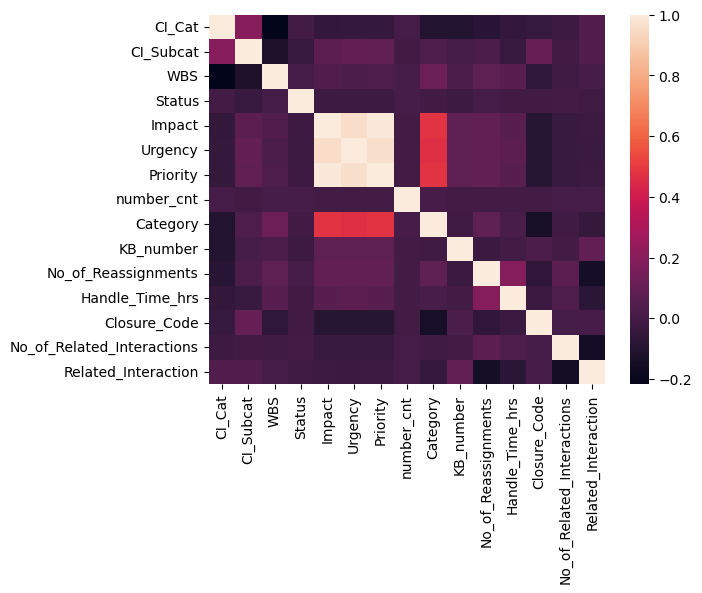

In [42]:
## check for correlation
sns.heatmap(data.corr())

    ** Here we can see that 'Impact','Urgency' and 'Priority' are highly correlated. As 'Priority' is our target column, so we will drop the other two.

In [42]:
data = data.drop(['Impact','Urgency'],axis = 1)

In [43]:
## Final data after preprocessing
data.head()

,CI_Cat,CI_Subcat,WBS,Status,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,1.000000,0.904762,0.501832,0.0,4.0,0.601285,0.333333,0.226425,0.666667,0.387180,0.461538,0.0,0.000046
1,0.090909,0.904762,0.256410,0.0,3.0,0.415038,0.333333,0.250000,0.846154,0.435491,0.769231,0.0,0.000070
2,0.090909,0.158730,0.271062,0.0,4.0,0.517542,1.000000,0.133772,0.076923,0.484325,0.307692,0.0,0.000093
3,0.090909,0.904762,0.256410,0.0,4.0,0.642921,0.333333,0.250000,0.333333,0.432195,0.384615,0.0,0.000116
4,0.090909,0.904762,0.256410,0.0,4.0,0.345245,0.333333,0.250000,0.051282,0.338400,0.461538,0.0,0.000139


### Splitting the data

In [45]:
x = data.drop('Priority',axis = 1)
y = data['Priority']

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [47]:
from imblearn.over_sampling import SMOTE

k_neighbors = min(5, 1)   ## Here 2 is taken from (minority_class_samples -1)

smote = SMOTE(k_neighbors=k_neighbors, random_state=42)
x_smote,y_smote = smote.fit_resample(x_train,y_train)

In [48]:
from collections import Counter
Counter(y)

Counter({4.0: 24097, 3.0: 5323, 5.0: 16486, 2.0: 697, 1.0: 3})

In [49]:
Counter(y_smote)

Counter({5.0: 19302, 4.0: 19302, 3.0: 19302, 2.0: 19302, 1.0: 19302})

# Models

## Logistic Regression

#### Model Creation

In [133]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)
model_lr

LogisticRegression()

#### Model Evaluation

In [134]:
y_pred_lr = model_lr.predict(x_test)

In [135]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
acc_lr = accuracy_score(y_test,y_pred_lr)
prec_lr = precision_score(y_test,y_pred_lr,average = "weighted")
rec_lr = recall_score(y_test,y_pred_lr,average = "weighted")
print("Accuracy Score : ",acc_lr)
print("Precision Score : ",prec_lr)
print("Recall Score : ",rec_lr)

Accuracy Score :  0.6756060931130659
Precision Score :  0.6760589233463711
Recall Score :  0.6756060931130659


## KNN

### Model Creation

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(x_train,y_train)
model_knn

KNeighborsClassifier(n_neighbors=3)

### Model Evaluation

In [137]:
y_pred_knn = model_knn.predict(x_test)

In [138]:
acc_knn = accuracy_score(y_test,y_pred_knn)
prec_knn = precision_score(y_test,y_pred_knn,average = "weighted")
rec_knn = recall_score(y_test,y_pred_knn,average = "weighted")
print("Accuracy Score : ",acc_knn)
print("Precision Score : ",prec_knn)
print("Recall Score : ",rec_knn)

Accuracy Score :  0.7647500536365587
Precision Score :  0.7679895354669686
Recall Score :  0.7647500536365587


## SVM

### Model Creation

In [139]:
from sklearn.svm import SVC
svm = SVC()
model_svm = svm.fit(x_train,y_train)
model_svm

SVC()

### Model Evaluation

In [140]:
y_pred_svm = model_svm.predict(x_test)

In [141]:
acc_svm = accuracy_score(y_test,y_pred_svm)
prec_svm = precision_score(y_test,y_pred_svm,average = "weighted")
rec_svm = recall_score(y_test,y_pred_svm,average = "weighted")
print("Accuracy Score : ",acc_svm)
print("Precision Score : ",prec_svm)
print("Recall Score : ",rec_svm)

Accuracy Score :  0.740506329113924
Precision Score :  0.7464293393236173
Recall Score :  0.740506329113924


### Hyper Parameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear']}
model = SVC()
grid = GridSearchCV(model, param_grid, scoring='f1', verbose=2, cv=5)

grid.fit(x, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .............................C=0.001, kernel=linear; total time=  47.8s
[CV] END .............................C=0.001, kernel=linear; total time=  48.1s
[CV] END .............................C=0.001, kernel=linear; total time=  51.3s
[CV] END .............................C=0.001, kernel=linear; total time=  49.9s
[CV] END .............................C=0.001, kernel=linear; total time=  47.4s
[CV] END ..............................C=0.01, kernel=linear; total time=  36.2s
[CV] END ..............................C=0.01, kernel=linear; total time=  37.5s
[CV] END ..............................C=0.01, kernel=linear; total time=  36.0s
[CV] END ..............................C=0.01, kernel=linear; total time=  36.5s
[CV] END ..............................C=0.01, kernel=linear; total time=  35.9s
[CV] END ...............................C=0.1, kernel=linear; total time=  38.5s
[CV] END ...............................C=0.1, ke

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear']},
             scoring='f1', verbose=2)

In [60]:
print(grid.best_params_)

{'C': 0.001, 'kernel': 'linear'}


In [61]:
svc_ht = SVC(C= 0.001 ,kernel='linear')
svc_ht.fit(x_train,y_train)

SVC(C=0.001, kernel='linear')

### Evaluation

In [63]:
y_pred_svm_ht = svc_ht.predict(x_test)

In [64]:
acc_svm_ht = accuracy_score(y_test,y_pred_svm_ht)
prec_svm_ht = precision_score(y_test,y_pred_svm_ht,average = "weighted")
rec_svm_ht = recall_score(y_test,y_pred_svm_ht,average = "weighted")
print("Accuracy Score : ",acc_svm_ht)
print("Precision Score : ",prec_svm_ht)
print("Recall Score : ",rec_svm_ht)

Accuracy Score :  0.6781806479296288
Precision Score :  0.6428394335582129
Recall Score :  0.6781806479296288


## Decision Tree

### Model Creation

In [142]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train,y_train)
model_dt

DecisionTreeClassifier()

### Model Evaluation

In [143]:
y_pred_dt = model_dt.predict(x_test)

In [144]:
acc_dt = accuracy_score(y_test,y_pred_dt)
prec_dt = precision_score(y_test,y_pred_dt,average = "weighted")
rec_dt = recall_score(y_test,y_pred_dt,average = "weighted")
print("Accuracy Score : ",acc_dt)
print("Precision Score : ",prec_dt)
print("Recall Score : ",rec_dt)

Accuracy Score :  0.8319030251019095
Precision Score :  0.8319566842959174
Recall Score :  0.8319030251019095


### HyperParameter Tuning

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
             'splitter' : ['best','random'],
             'min_samples_leaf' : [2,5,8,10,15],
             'min_samples_split' : [3,7,9,13],
             'max_depth' : [2,4,7,6]}

dtr = DecisionTreeClassifier(random_state=34)
grid_cv = GridSearchCV(dtr,param_grid,scoring='f1',verbose=3,cv=4,n_jobs=-1)
grid_cv.fit(x_train,y_train)
best_params = grid_cv.best_params_
print('Best Parameters')
print(best_params)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Best Parameters
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}


In [93]:
model_dtc_ht = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 2, min_samples_split= 3, splitter='best')
model_dtc_ht.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=3)

In [94]:
y_pred_dtc_ht = model_dtc_ht.predict(x_test)

### Evaluation

In [95]:
acc_dtc_ht = accuracy_score(y_test,y_pred_dtc_ht)
prec_dtc_ht = precision_score(y_test,y_pred_dtc_ht,average='weighted')
rec_dtc_ht = recall_score(y_test,y_pred_dtc_ht,average='weighted')
print("Accuracy Score : ",acc_dtc_ht)
print("Precision Score : ",prec_dtc_ht)
print("Recall Score : ",rec_dtc_ht)

Accuracy Score :  0.6782879210469857
Precision Score :  0.6428982642199933
Recall Score :  0.6782879210469857


## Random Forest

### Model Creation

In [145]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_rfc = rfc.fit(x_train,y_train)
model_rfc

RandomForestClassifier()

### Model Evaluation

In [146]:
y_pred_rfc = model_rfc.predict(x_test)

In [147]:
acc_rfc = accuracy_score(y_test,y_pred_rfc)
prec_rfc = precision_score(y_test,y_pred_rfc,average='weighted')
rec_rfc = recall_score(y_test,y_pred_rfc,average='weighted')
print("Accuracy Score : ",acc_rfc)
print("Precision Score : ",prec_rfc)
print("Recall Score : ",rec_rfc)

Accuracy Score :  0.8645140527783738
Precision Score :  0.8637834766406379
Recall Score :  0.8645140527783738


### HyperParameter Tuning

In [99]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [200,250,270,310,350,390]
max_features = ['log2','sqrt']
max_depth = [10,20,30,40,50]
min_samples_split = [2,5,7,9,14]
min_samples_leaf = [2,5,6,8,10]
bootstrap = [True,False]


random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

In [100]:
model_rfc_ht = RandomForestClassifier(random_state=34)
rfc_cv = RandomizedSearchCV(estimator=model_rfc_ht,scoring='f1',param_distributions = random_grid,n_iter=100,cv=3,verbose=3)
rfc_cv.fit(x_train,y_train)
best_param = rfc_cv.best_params_
print('Best Parameters')
print(best_param)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=310;, score=nan total time=  55.5s
[CV 2/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=310;, score=nan total time=  56.7s
[CV 3/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=310;, score=nan total time=  47.3s
[CV 1/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=nan total time=  45.0s
[CV 2/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=nan total time=  48.2s
[CV 3/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=250;, score=nan total time=  47.9s
[CV 1/3] END bootstrap=False, m

[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=390;, score=nan total time= 1.0min
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=390;, score=nan total time= 1.0min
[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=390;, score=nan total time= 1.1min
[CV 1/3] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=310;, score=nan total time=  41.2s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=310;, score=nan total time=  41.6s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=310;, score=nan total time=  40.0s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samp

[CV 1/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=350;, score=nan total time=  24.7s
[CV 2/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=350;, score=nan total time=  23.5s
[CV 3/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=350;, score=nan total time=  24.0s
[CV 1/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=nan total time=  14.7s
[CV 2/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=nan total time=  14.6s
[CV 3/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=nan total time=  14.8s
[CV 1/3] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=6, min_s

[CV 1/3] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=nan total time=  14.0s
[CV 2/3] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=nan total time=  13.9s
[CV 3/3] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=nan total time=  14.6s
[CV 1/3] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=350;, score=nan total time=  26.7s
[CV 2/3] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=350;, score=nan total time=  26.3s
[CV 3/3] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=350;, score=nan total time=  26.6s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=8, min_samp

[CV 1/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=310;, score=nan total time=  47.7s
[CV 2/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=310;, score=nan total time=  48.1s
[CV 3/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=310;, score=nan total time=  48.9s
[CV 1/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=7, n_estimators=270;, score=nan total time=  48.8s
[CV 2/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=7, n_estimators=270;, score=nan total time=  49.1s
[CV 3/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=7, n_estimators=270;, score=nan total time=  49.1s
[CV 1/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_sa

[CV 1/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=270;, score=nan total time=  45.3s
[CV 2/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=270;, score=nan total time=23.1min
[CV 3/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=270;, score=nan total time=  47.6s
[CV 1/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=200;, score=nan total time=  47.3s
[CV 2/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=200;, score=nan total time=  47.0s
[CV 3/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=200;, score=nan total time=  44.9s
[CV 1/3] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_sampl

In [101]:
model_rfc_ht = RandomForestClassifier(n_estimators= 310, min_samples_split= 5, min_samples_leaf= 5, max_features= 'sqrt', max_depth= 50, bootstrap= True)
model_rfc_ht.fit(x_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=310)

In [102]:
y_pred_rfc_ht = model_rfc_ht.predict(x_test)

### Evaluation

In [103]:
acc_rfc_ht = accuracy_score(y_test,y_pred_rfc_ht)
prec_rfc_ht = precision_score(y_test,y_pred_rfc_ht,average='weighted')
rec_rfc_ht = recall_score(y_test,y_pred_rfc_ht,average='weighted')
print("Accuracy Score : ",acc_rfc_ht)
print("Precision Score : ",prec_rfc_ht)
print("Recall Score : ",rec_rfc_ht)

Accuracy Score :  0.8567903883286848
Precision Score :  0.8571246414431126
Recall Score :  0.8567903883286848


## Gradient Boosting

### Model Creation

In [148]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(x_train,y_train)
model_gbc

GradientBoostingClassifier()

### Model Evaluation

In [149]:
y_pred_gbc = model_gbc.predict(x_test)

In [150]:
acc_gbc = accuracy_score(y_test,y_pred_gbc)
prec_gbc = precision_score(y_test,y_pred_gbc,average='weighted')
rec_gbc = recall_score(y_test,y_pred_gbc,average='weighted')
print("Accuracy Score : ",acc_gbc)
print("Precision Score : ",prec_gbc)
print("Recall Score : ",rec_gbc)

Accuracy Score :  0.8241793606522205
Precision Score :  0.8251829290954178
Recall Score :  0.8241793606522205


## Final Report

In [154]:
scores = [acc_lr,acc_knn,acc_svm,acc_dt,acc_rfc,acc_gbc]
algorithms = ['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','Gradient Boosting']

for i in range(len(scores)):
    print('Accuracy score in' + ' ' + algorithms[i] + ' ' + 'is' + ' :- ' + f'{scores[i]*100}' + '%')

Accuracy score in Logistic Regression is :- 67.56060931130659%
Accuracy score in KNN is :- 76.47500536365587%
Accuracy score in SVM is :- 74.0506329113924%
Accuracy score in Decision Tree is :- 83.19030251019095%
Accuracy score in Random Forest is :- 86.45140527783738%
Accuracy score in Gradient Boosting is :- 82.41793606522205%


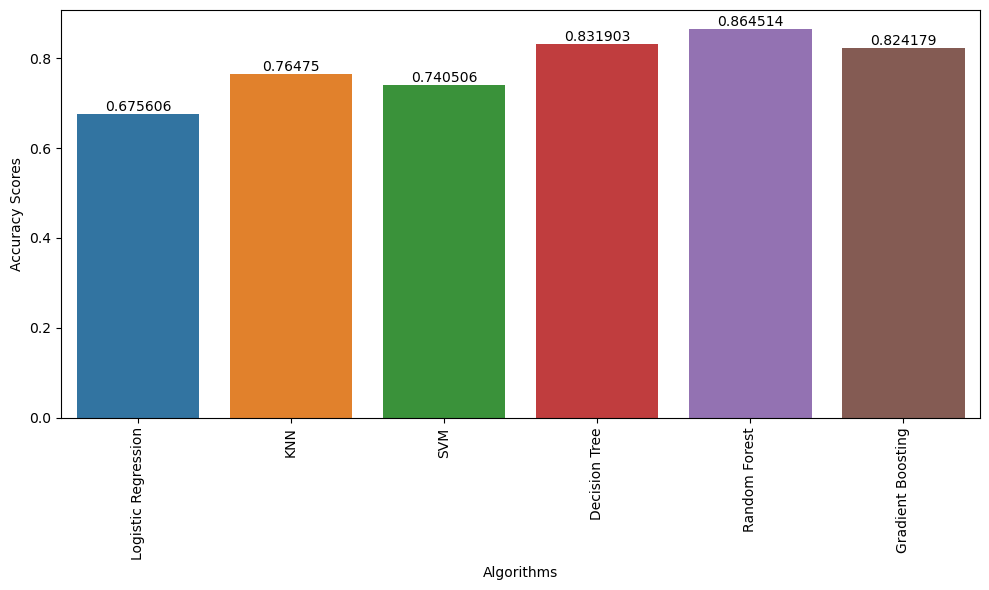

In [155]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel('Accuracy Scores')
ax = sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary

        ** After trying various models, Random Forest is giving an accuracy score of 86%. Indicating that these two are the superior models.

## Conclusion

        ** In conclusion, our machine learning model utilizing Random Forest has yielded best performance in predicting high priority tickets, achieving an accuracy score of 86%. This score indicates that approximately 86% of the variability in the target variable, the high priority ticket prediction, is explained by the features included in the model.

# Task 2 :  Forecast the incident volume in different fields , quarterly and annual.

    **For the forcasting we need "Incident_ID & Open_Time" column.

## Fetching data

In [3]:
table = pd.read_sql_query("select * from dataset_list",connection)

In [4]:
table.shape

(46606, 25)

In [5]:
table.head(1)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,


In [6]:
# Imporing the necessary columns
df = table.loc[:,['Incident_ID','Open_Time']]

In [7]:
df.head()

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01


## Data Preprocessing

In [8]:
# Converting datatype of Open_Time column
df['Open_Time'] = pd.to_datetime(df['Open_Time'])

In [9]:
# Fetch monthwise from Open Time:

from datetime import datetime

monthwise=[]
for x in df['Open_Time']:
  y,z = x.year,x.month
  w = datetime(year=y, month=z, day=1)
  monthwise.append(w)
df['Monthwise']=monthwise
df.drop('Open_Time',axis=1,inplace=True)
print('Shape:',df.shape)
df

Shape: (46606, 2)


,Incident_ID,Monthwise
0,IM0000004,2012-05-01
1,IM0000005,2012-12-01
2,IM0000006,2012-03-01
3,IM0000011,2012-07-01
4,IM0000012,2012-10-01
...,...,...
46601,IM0047053,2014-03-01
46602,IM0047054,2014-03-01
46603,IM0047055,2014-03-01
46604,IM0047056,2014-03-01


In [10]:
# Group Monthwise in ascending order
print('Rows after groupby:',len(df.groupby('Monthwise')['Incident_ID'].count()))
group=df.groupby('Monthwise')['Incident_ID'].count()
group.head()

Rows after groupby: 34


Monthwise
2012-01-01    1
2012-02-01    1
2012-03-01    2
2012-05-01    2
2012-07-01    2
Name: Incident_ID, dtype: int64

In [11]:
# We are making dataset of total number of incidents based on months:
Monthwise = []
Incidents=[]
for x in range(34):
  Monthwise.append(group.index[x])
  Incidents.append(group[x])

Mdate = pd.DataFrame({'Monthwise':Monthwise,'Incidents':Incidents})
print('Shape:',Mdate.shape)
Mdate.set_index('Monthwise',inplace=True)
Mdate

Shape: (34, 2)


,Incidents
Monthwise,
2012-01-01,1
2012-02-01,1
2012-03-01,2
2012-05-01,2
2012-07-01,2
2012-08-01,3
2012-09-01,1
2012-10-01,6
2012-11-01,1


In [12]:
# We will take data from 2013-01-01	because in year 2012 incidents is very less which affect forecasting compared to 2013 and 2014 year.
Mdate_N = Mdate['2013-01-01':]
print('Shape:',Mdate_N.shape)
Mdate_N

Shape: (24, 1)


,Incidents
Monthwise,
2013-01-01,764
2013-02-01,828
2013-03-01,869
2013-04-01,1196
2013-05-01,825
2013-06-01,796
2013-07-01,898
2013-08-01,761
2013-09-01,1516


### Quaterly forecasting

In [13]:
Mdate_quarterly = Mdate_N.resample('Q').sum()
Mdate_quarterly

,Incidents
Monthwise,
2013-03-31,2461
2013-06-30,2817
2013-09-30,3175
2013-12-31,16153
2014-03-31,15036
2014-06-30,2643
2014-09-30,1783
2014-12-31,2517


<Figure size 1000x600 with 0 Axes>

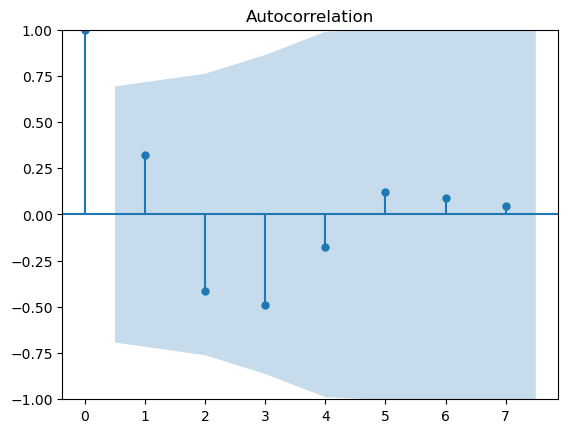

In [14]:
# Checking Stationary of dataset
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,6))
plot_acf(Mdate_quarterly)
plt.show()
# It is stationary from the below graph

In [15]:
# Creating Training and Testing dataset.
QTrain=Mdate_quarterly[:5]
QTest=Mdate_quarterly[5:]
print('Shape of Mdate_quarterly:',Mdate_quarterly.shape)
print('Shape of Train:',QTrain.shape)
print('Shape of Test:',QTest.shape)

Shape of Mdate_quarterly: (8, 1)
Shape of Train: (5, 1)
Shape of Test: (3, 1)


In [19]:
# We will get the Optimal values of (p,d,q).
import itertools
from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

p = range(0,4)
d = range(0,1)
q = range(0,3)
pdq = list(itertools.product(p,d,q))

MSE = []
Parameter = []
for x in tqdm(pdq):
    Model = ARIMA(QTrain, order=x).fit()
    QPredict = Model.forecast(steps=3)
    MSE.append(mean_squared_error(QTest,QPredict))
    Parameter.append(x)
    print(x)

 17%|█████████████▊                                                                     | 2/12 [00:00<00:01,  8.40it/s]

(0, 0, 0)
(0, 0, 1)


 25%|████████████████████▊                                                              | 3/12 [00:00<00:01,  6.65it/s]

(0, 0, 2)
(1, 0, 0)


C:\Users\ASIF ALI KHAN\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 42%|██████████████████████████████████▌                                                | 5/12 [00:00<00:00,  7.17it/s]C:\Users\ASIF ALI KHAN\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 50%|█████████████████████████████████████████▌                                         | 6/12 [00:00<00:00,  6.28it/s]

(1, 0, 1)
(1, 0, 2)
(2, 0, 0)


C:\Users\ASIF ALI KHAN\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:01<00:00,  6.83it/s]

(2, 0, 1)
(2, 0, 2)


C:\Users\ASIF ALI KHAN\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [00:01<00:00,  6.08it/s]

(3, 0, 0)


C:\Users\ASIF ALI KHAN\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:01<00:00,  5.24it/s]

(3, 0, 1)


C:\Users\ASIF ALI KHAN\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  5.79it/s]

(3, 0, 2)


In [20]:
# Least MSE with index and Best (p,d,q) combination:
print('MSE:',min(MSE),'Index:',np.argmin(MSE))
Index=np.argmin(MSE)
print('(p,d,q):',Parameter[Index])
QParam=Parameter[Index]

MSE: 8944328.107677609 Index: 7
(p,d,q): (2, 0, 1)


In [21]:
# Now Train model with this parameter for next 3 quarters:
Model = ARIMA(QTrain, order=QParam).fit()
QPredict=Model.forecast(steps=6)

C:\Users\ASIF ALI KHAN\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
# Merge Train data with Predict_df
QPredict_df=pd.DataFrame({'Incidents':QPredict})
QTrain_with_Predict=pd.concat([QTrain,QPredict_df],axis=0)
print('Shape:',QTrain_with_Predict.shape)

Shape: (11, 1)


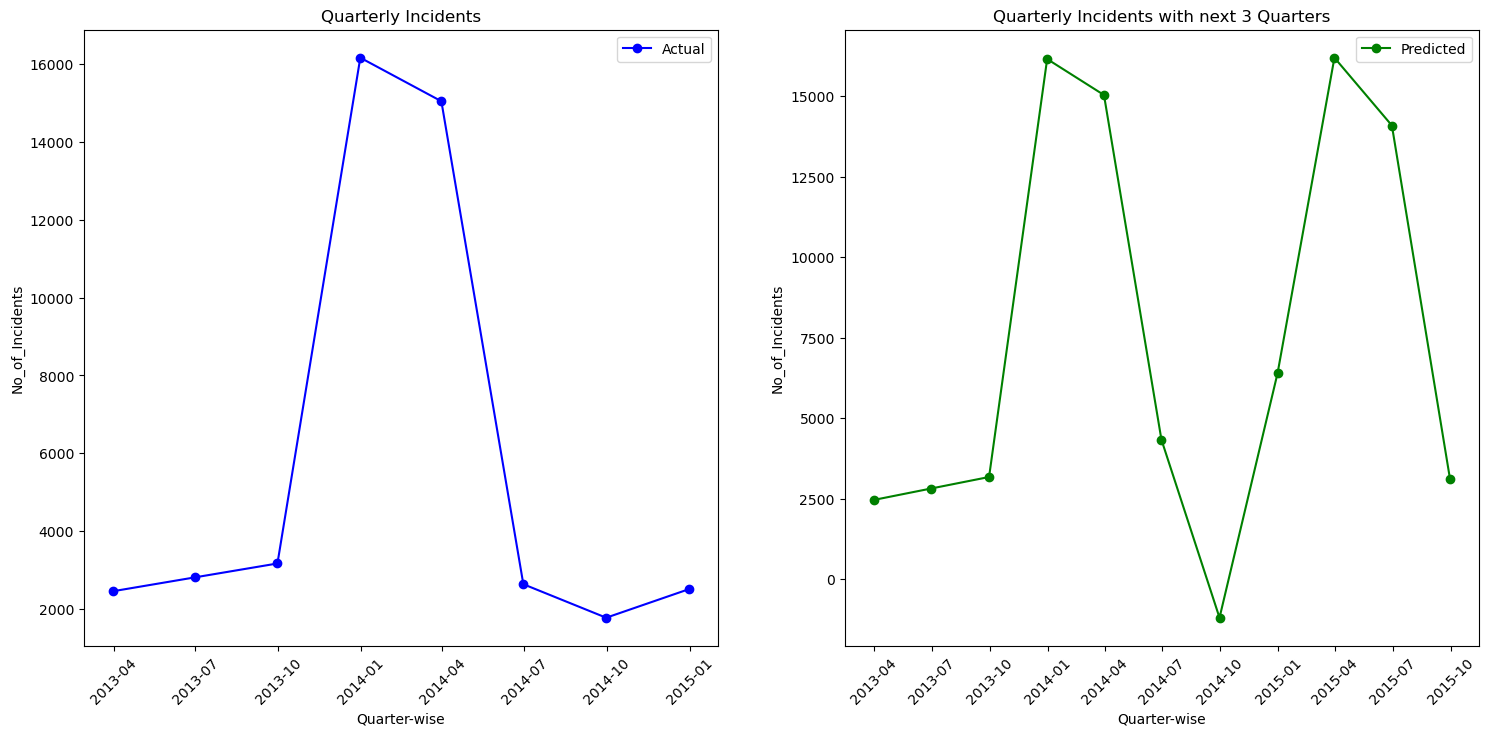

In [23]:
# Graphical Representation of Train with predict and Mdate(Train and Test) dataset:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(Mdate_quarterly.index, Mdate_quarterly['Incidents'],color='blue',marker='o',label='Actual')
plt.legend()
plt.title('Quarterly Incidents')
plt.xlabel('Quarter-wise')
plt.xticks(rotation=45)
plt.ylabel('No_of_Incidents')
plt.legend()
plt.subplot(1,2,2)
plt.plot(QTrain_with_Predict.index, QTrain_with_Predict,color='green',marker='o',label='Predicted')
plt.title('Quarterly Incidents with next 3 Quarters')
plt.xlabel('Quarter-wise')
plt.xticks(rotation=45)
plt.ylabel('No_of_Incidents')
plt.legend()
plt.show()

--------
### **Next 3 Quarterwise Prediction of Incidents:**

From the above graph we can analyse that quarter wise result have variation on future prediction on next 3 quarters because we have very less dataset for Quarters.

```
2015-03-31    16193.964191
2015-06-30    14089.153918
2015-09-30     3120.236192
```

### Yearly forecasting

In [25]:
Mdate_yearly = Mdate.resample('Y').sum()
Mdate_yearly

,Incidents
Monthwise,
2012-12-31,21
2013-12-31,24606
2014-12-31,21979


<Figure size 1000x600 with 0 Axes>

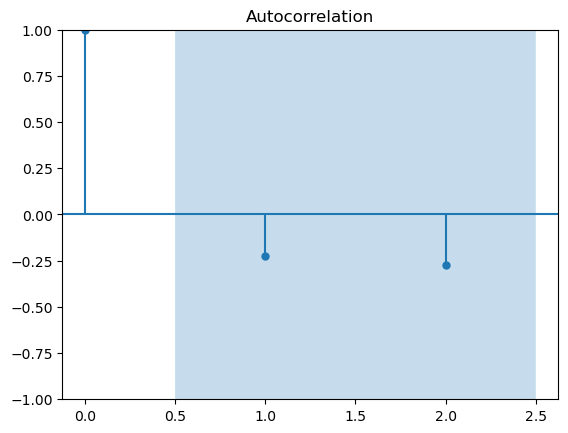

In [26]:
# Checking Stationary of dataset
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,6))
plot_acf(Mdate_yearly)
plt.show()
# It is stationary from the below graph

In [30]:
# Creating Training and Testing dataset.
YTrain=Mdate_yearly[:2]
YTest=Mdate_yearly[2:]
print('Shape of Mdate_quarterly:',Mdate_yearly.shape)
print('Shape of Train:',YTrain.shape)
print('Shape of Test:',YTest.shape)

Shape of Mdate_quarterly: (3, 1)
Shape of Train: (2, 1)
Shape of Test: (1, 1)


In [32]:
# We will get the Optimal values of (p,d,q).
p = range(0,4)
d = range(0,1)
q = range(0,3)
pdq = list(itertools.product(p,d,q))

MSE = []
Parameter = []
for x in tqdm(pdq):
    Model = ARIMA(YTrain, order=x).fit()
    YPredict = Model.forecast(steps=1)
    MSE.append(mean_squared_error(YTest,YPredict))
    Parameter.append(x)
    print(x)

 25%|████████████████████▊                                                              | 3/12 [00:00<00:00, 25.79it/s]

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(1, 0, 0)


C:\Users\ASIF ALI KHAN\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 1)


C:\Users\ASIF ALI KHAN\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:00<00:00, 11.42it/s]

(1, 0, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(3, 0, 0)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 12.55it/s]

(3, 0, 1)
(3, 0, 2)


In [33]:
# Least MSE with index and Best (p,d,q) combination:
print('MSE:',min(MSE),'Index:',np.argmin(MSE))
Index=np.argmin(MSE)
print('(p,d,q):',Parameter[Index])
YParam=Parameter[Index]

MSE: 93421890.25000007 Index: 0
(p,d,q): (0, 0, 0)


In [34]:
# Now Train model with this parameter for next 3 quarters:
Model = ARIMA(YTrain, order=YParam).fit()
YPredict=Model.forecast(steps=1)

In [35]:
# Merge Train data with Predict_df
YPredict_df=pd.DataFrame({'Incidents':YPredict})
YTrain_with_Predict=pd.concat([YTrain,YPredict_df],axis=0)
print('Shape:',YTrain_with_Predict.shape)

Shape: (3, 1)


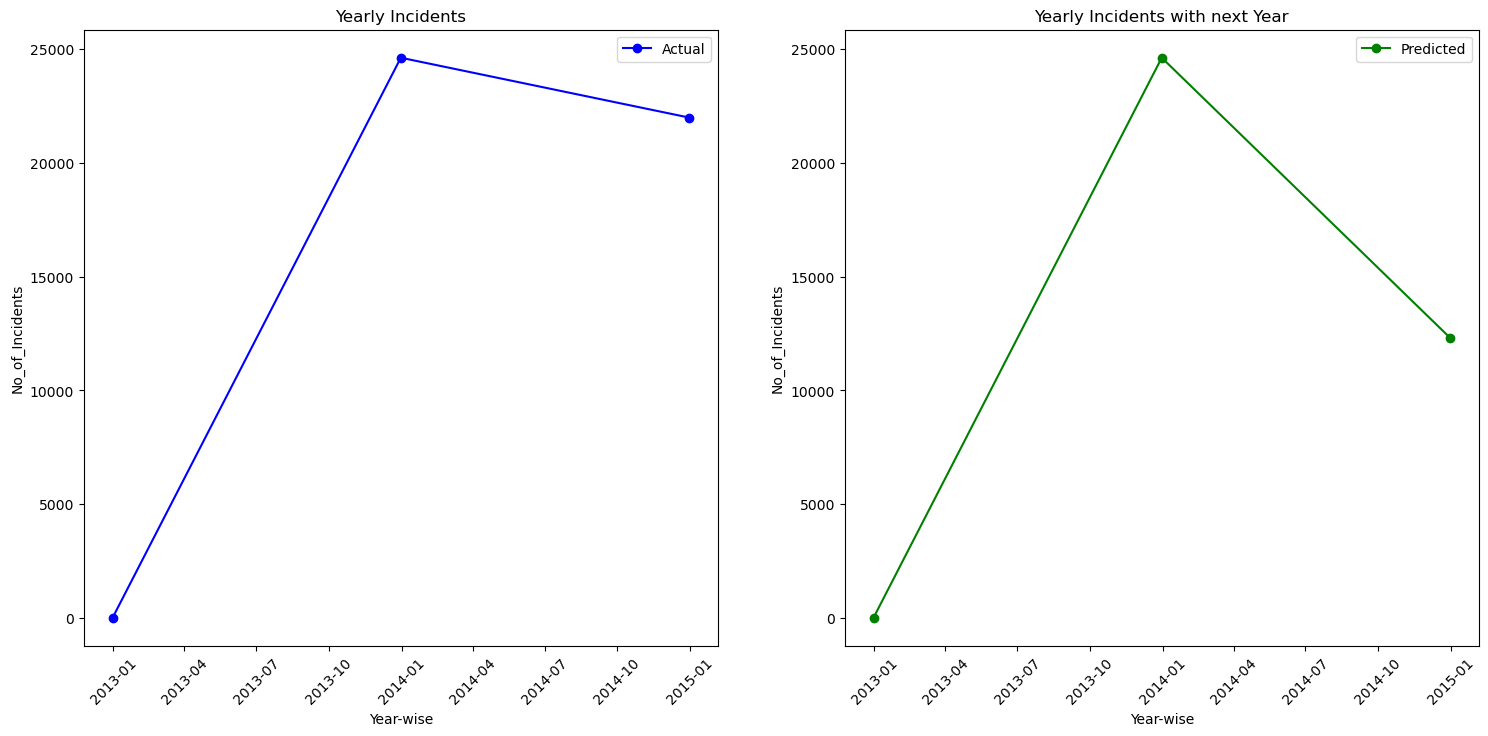

In [36]:
# Graphical Representation of Train with predict and Mdate(Train and Test) dataset:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(Mdate_yearly.index, Mdate_yearly['Incidents'],color='blue',marker='o',label='Actual')
plt.legend()
plt.title('Yearly Incidents')
plt.xlabel('Year-wise')
plt.xticks(rotation=45)
plt.ylabel('No_of_Incidents')
plt.legend()
plt.subplot(1,2,2)
plt.plot(YTrain_with_Predict.index, YTrain_with_Predict,color='green',marker='o',label='Predicted')
plt.title('Yearly Incidents with next Year')
plt.xlabel('Year-wise')
plt.xticks(rotation=45)
plt.ylabel('No_of_Incidents')
plt.legend()
plt.show()

--------
### **Next Year Prediction of Incidents:**

From the above graph we can analyse that quarter wise result have variation on future prediction on next 3 quarters because we have very less dataset for Quarters.

```
2014-12-31    12313.964191
```



# Task 3 : Auto tag the tickets with right priorities and right departments.

In [44]:
## For this prediction we need only few columns, which are :
data_auto = data.loc[:,['CI_Cat', 'CI_Subcat','Status','Priority','Category','Closure_Code','No_of_Reassignments','Handle_Time_hrs','No_of_Related_Interactions']]

In [45]:
data_auto.head()

,CI_Cat,CI_Subcat,Status,Priority,Category,Closure_Code,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions
0,1.000000,0.904762,0.0,4.0,0.333333,0.461538,0.666667,0.387180,0.0
1,0.090909,0.904762,0.0,3.0,0.333333,0.769231,0.846154,0.435491,0.0
2,0.090909,0.158730,0.0,4.0,1.000000,0.307692,0.076923,0.484325,0.0
3,0.090909,0.904762,0.0,4.0,0.333333,0.384615,0.333333,0.432195,0.0
4,0.090909,0.904762,0.0,4.0,0.333333,0.461538,0.051282,0.338400,0.0


    ** Here CI_Cat is our target variable and it is scaled. So, we will take the target column from fresh data and concatenate that.

In [46]:
data_auto = data_auto.drop('CI_Cat',axis=1)

In [47]:
data_new = pd.read_sql_query("select * from dataset_list",connection)

In [48]:
target = data_new.loc[:,['CI_Cat']]

In [49]:
data_auto = pd.concat([target,data_auto],axis=1)

In [50]:
data_auto.head()

,CI_Cat,CI_Subcat,Status,Priority,Category,Closure_Code,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions
0,subapplication,0.904762,0.0,4.0,0.333333,0.461538,0.666667,0.387180,0.0
1,application,0.904762,0.0,3.0,0.333333,0.769231,0.846154,0.435491,0.0
2,application,0.158730,0.0,4.0,1.000000,0.307692,0.076923,0.484325,0.0
3,application,0.904762,0.0,4.0,0.333333,0.384615,0.333333,0.432195,0.0
4,application,0.904762,0.0,4.0,0.333333,0.461538,0.051282,0.338400,0.0


In [86]:
data_auto.CI_Cat = le.fit_transform(data_auto.CI_Cat)

In [87]:
data_auto.head()

,CI_Cat,CI_Subcat,Status,Priority,Category,Closure_Code,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions
0,12,0.904762,0.0,4.0,0.333333,0.461538,0.666667,0.387180,0.0
1,2,0.904762,0.0,3.0,0.333333,0.769231,0.846154,0.435491,0.0
2,2,0.158730,0.0,4.0,1.000000,0.307692,0.076923,0.484325,0.0
3,2,0.904762,0.0,4.0,0.333333,0.384615,0.333333,0.432195,0.0
4,2,0.904762,0.0,4.0,0.333333,0.461538,0.051282,0.338400,0.0


#### Since, all EDA and Data preprocessing in performed earlier we will go directly for model building.

### Splitting Data

In [97]:
x = data_auto.drop('CI_Cat',axis=1)
y = data_auto['CI_Cat']

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=43)

# Models 

## Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)
model_lr

LogisticRegression()

## Model Evaluation

In [100]:
y_pred_lr = model_lr.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
acc_lr = accuracy_score(y_test,y_pred_lr)
prec_lr = precision_score(y_test,y_pred_lr,average = "weighted")
rec_lr = recall_score(y_test,y_pred_lr,average = "weighted")
print("Accuracy Score : ",acc_lr)
print("Precision Score : ",prec_lr)
print("Recall Score : ",rec_lr)

Accuracy Score :  0.7247371808624758
Precision Score :  0.6377604046721469
Recall Score :  0.7247371808624758


## KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(x_train,y_train)
model_knn

KNeighborsClassifier(n_neighbors=3)

### Model Evaluation

In [105]:
y_pred_knn = model_knn.predict(x_test)

In [106]:
acc_knn = accuracy_score(y_test,y_pred_knn)
prec_knn = precision_score(y_test,y_pred_knn,average = "weighted")
rec_knn = recall_score(y_test,y_pred_knn,average = "weighted")
print("Accuracy Score : ",acc_knn)
print("Precision Score : ",prec_knn)
print("Recall Score : ",rec_knn)

Accuracy Score :  0.8079811199313452
Precision Score :  0.8000737028620948
Recall Score :  0.8079811199313452


## Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train,y_train)
model_dt

DecisionTreeClassifier()

### Model Evaluation

In [110]:
y_pred_dt = model_dt.predict(x_test)

In [111]:
acc_dt = accuracy_score(y_test,y_pred_dt)
prec_dt = precision_score(y_test,y_pred_dt,average = "weighted")
rec_dt = recall_score(y_test,y_pred_dt,average = "weighted")
print("Accuracy Score : ",acc_dt)
print("Precision Score : ",prec_dt)
print("Recall Score : ",rec_dt)

Accuracy Score :  0.8235357219480798
Precision Score :  0.8197310154501551
Recall Score :  0.8235357219480798


### HyperParameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
             'splitter' : ['best','random'],
             'min_samples_leaf' : [2,5,8,10,15],
             'min_samples_split' : [3,7,9,13],
             'max_depth' : [2,4,7,6]}

dtr = DecisionTreeClassifier(random_state=34)
grid_cv = GridSearchCV(dtr,param_grid,scoring='f1',verbose=3,cv=4,n_jobs=-1)
grid_cv.fit(x_train,y_train)
best_params = grid_cv.best_params_
print('Best Parameters')
print(best_params)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Best Parameters
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}


In [113]:
model_dtc_ht = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 2, min_samples_split= 3, splitter='best')
model_dtc_ht.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=3)

### Evaluation

In [115]:
y_pred_dtc_ht = model_dtc_ht.predict(x_test)

In [116]:
acc_dtc_ht = accuracy_score(y_test,y_pred_dtc_ht)
prec_dtc_ht = precision_score(y_test,y_pred_dtc_ht,average='weighted')
rec_dtc_ht = recall_score(y_test,y_pred_dtc_ht,average='weighted')
print("Accuracy Score : ",acc_dtc_ht)
print("Precision Score : ",prec_dtc_ht)
print("Recall Score : ",rec_dtc_ht)

Accuracy Score :  0.7496245440892513
Precision Score :  0.5838297824473918
Recall Score :  0.7496245440892513


## Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_rfc = rfc.fit(x_train,y_train)
model_rfc

RandomForestClassifier()

### Model Evaluation

In [118]:
y_pred_rfc = model_rfc.predict(x_test)

In [119]:
acc_rfc = accuracy_score(y_test,y_pred_rfc)
prec_rfc = precision_score(y_test,y_pred_rfc,average='weighted')
rec_rfc = recall_score(y_test,y_pred_rfc,average='weighted')
print("Accuracy Score : ",acc_rfc)
print("Precision Score : ",prec_rfc)
print("Recall Score : ",rec_rfc)

Accuracy Score :  0.8214975327183008
Precision Score :  0.8149772892417108
Recall Score :  0.8214975327183008


### HyperParameter Tuning

In [120]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [200,250,270,310,350,390]
max_features = ['log2','sqrt']
max_depth = [10,20,30,40,50]
min_samples_split = [2,5,7,9,14]
min_samples_leaf = [2,5,6,8,10]
bootstrap = [True,False]


random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

In [121]:
model_rfc_ht = RandomForestClassifier(random_state=34)
rfc_cv = RandomizedSearchCV(estimator=model_rfc_ht,scoring='f1',param_distributions = random_grid,n_iter=100,cv=3,verbose=3)
rfc_cv.fit(x_train,y_train)
best_param = rfc_cv.best_params_
print('Best Parameters')
print(best_param)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=200;, score=nan total time=  33.9s
[CV 2/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=200;, score=nan total time=  29.8s
[CV 3/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=200;, score=nan total time=  29.0s
[CV 1/3] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=nan total time=  32.5s
[CV 2/3] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=nan total time=  30.5s
[CV 3/3] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=nan total time=  30.7s
[CV 1/3] END bootstrap=Tr

[CV 1/3] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=9, n_estimators=310;, score=nan total time=  28.1s
[CV 2/3] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=9, n_estimators=310;, score=nan total time=  27.6s
[CV 3/3] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=9, n_estimators=310;, score=nan total time=  27.4s
[CV 1/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=250;, score=nan total time=  24.7s
[CV 2/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=250;, score=nan total time=  23.8s
[CV 3/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=250;, score=nan total time=  24.8s
[CV 1/3] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=5, min_sa

[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=9, n_estimators=350;, score=nan total time=  15.6s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=9, n_estimators=350;, score=nan total time=  14.9s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=9, n_estimators=350;, score=nan total time=  16.5s
[CV 1/3] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=390;, score=nan total time=  42.9s
[CV 2/3] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=390;, score=nan total time=  46.5s
[CV 3/3] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=390;, score=nan total time=  47.7s
[CV 1/3] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samp

[CV 1/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=250;, score=nan total time=  17.3s
[CV 2/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=250;, score=nan total time=  17.4s
[CV 3/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=250;, score=nan total time=  17.5s
[CV 1/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=390;, score=nan total time=  30.0s
[CV 2/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=390;, score=nan total time=  29.6s
[CV 3/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=390;, score=nan total time=  29.8s
[CV 1/3] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_

[CV 1/3] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=390;, score=nan total time=  55.7s
[CV 2/3] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=390;, score=nan total time=  51.6s
[CV 3/3] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=390;, score=nan total time=  53.3s
[CV 1/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=310;, score=nan total time=  41.3s
[CV 2/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=310;, score=nan total time=  38.0s
[CV 3/3] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=310;, score=nan total time=  40.1s
[CV 1/3] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=8, min_sa

[CV 1/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=250;, score=nan total time=   7.7s
[CV 2/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=250;, score=nan total time=   7.5s
[CV 3/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=250;, score=nan total time=   7.9s
[CV 1/3] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=270;, score=nan total time=  19.4s
[CV 2/3] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=270;, score=nan total time=  18.8s
[CV 3/3] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=270;, score=nan total time=  20.2s
[CV 1/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samp

In [122]:
model_rfc_ht = RandomForestClassifier(n_estimators= 200, min_samples_split= 9, min_samples_leaf= 2, max_features= 'log2', max_depth= 40, bootstrap= False)
model_rfc_ht.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='log2',
                       min_samples_leaf=2, min_samples_split=9,
                       n_estimators=200)

### Evaluation

In [124]:
y_pred_rfc_ht = model_rfc_ht.predict(x_test)

In [125]:
acc_rfc_ht = accuracy_score(y_test,y_pred_rfc_ht)
prec_rfc_ht = precision_score(y_test,y_pred_rfc_ht,average='weighted')
rec_rfc_ht = recall_score(y_test,y_pred_rfc_ht,average='weighted')
print("Accuracy Score : ",acc_rfc_ht)
print("Precision Score : ",prec_rfc_ht)
print("Recall Score : ",rec_rfc_ht)

Accuracy Score :  0.8395194164342415
Precision Score :  0.8275744989453339
Recall Score :  0.8395194164342415


## Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(x_train,y_train)
model_gbc

GradientBoostingClassifier()

### Model Evaluation

In [127]:
y_pred_gbc = model_gbc.predict(x_test)

In [128]:
acc_gbc = accuracy_score(y_test,y_pred_gbc)
prec_gbc = precision_score(y_test,y_pred_gbc,average='weighted')
rec_gbc = recall_score(y_test,y_pred_gbc,average='weighted')
print("Accuracy Score : ",acc_gbc)
print("Precision Score : ",prec_gbc)
print("Recall Score : ",rec_gbc)

Accuracy Score :  0.8532503754559108
Precision Score :  0.8373606190991433
Recall Score :  0.8532503754559108


## Final Report

In [130]:
scores = [acc_lr,acc_knn,acc_dt,acc_rfc_ht,acc_gbc]
algorithms = ['Logistic Regression','KNN','Decision Tree','Random Forest','Gradient Boosting']

for i in range(len(scores)):
    print('Accuracy score in' + ' ' + algorithms[i] + ' ' + 'is' + ' :- ' + f'{scores[i]*100}' + '%')

Accuracy score in Logistic Regression is :- 72.47371808624759%
Accuracy score in KNN is :- 80.79811199313453%
Accuracy score in Decision Tree is :- 82.35357219480798%
Accuracy score in Random Forest is :- 83.95194164342415%
Accuracy score in Gradient Boosting is :- 85.32503754559107%


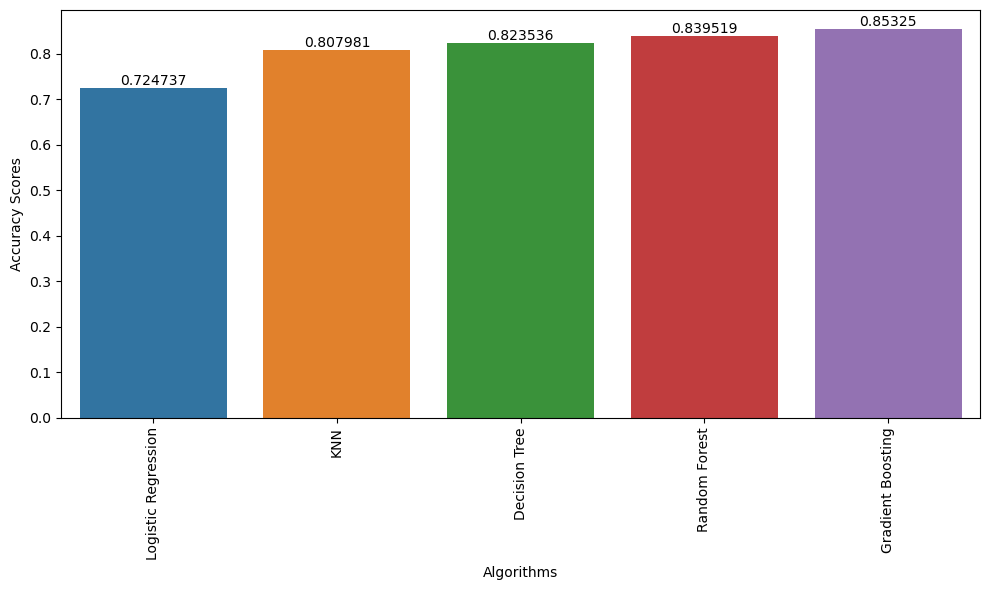

In [131]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel('Accuracy Scores')
ax = sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary

     ** After trying various models, Gradient Boosting is  giving an accuracy score of 85%. Indicating that these two are the superior models.


## Conclusion

    ** In conclusion, our machine learning model utilizing Gradient Boosting has yielded best performance in      predicting high priority tickets, achieving an accuracy score of  85%. This score indicates that approximately 85% of the variability in the target variable, the high priority ticket prediction, is explained by the         features included in the model.

# Task 4 : Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

In [50]:
# for this prediction we need the following columns, and No_of_Related_Changes would be our target variable
data_rfc = data.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions']]
target_col = data_new.loc[:,'No_of_Related_Changes']

In [51]:
final_data = pd.concat([data_rfc,target_col],axis=1)

In [52]:
final_data.head()

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Changes
0,0.904762,0.501832,4.0,0.333333,0.0,
1,0.904762,0.256410,3.0,0.333333,0.0,
2,0.158730,0.271062,4.0,1.000000,0.0,
3,0.904762,0.256410,4.0,0.333333,0.0,
4,0.904762,0.256410,4.0,0.333333,0.0,


In [53]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Subcat                   46606 non-null  float64
 1   WBS                         46606 non-null  float64
 2   Priority                    46606 non-null  float64
 3   Category                    46606 non-null  float64
 4   No_of_Related_Interactions  46606 non-null  float64
 5   No_of_Related_Changes       46606 non-null  object 
dtypes: float64(5), object(1)
memory usage: 2.1+ MB


In [54]:
final_data = final_data.replace('','0')

In [55]:
final_data.isnull().sum()

CI_Subcat                     0
WBS                           0
Priority                      0
Category                      0
No_of_Related_Interactions    0
No_of_Related_Changes         0
dtype: int64

In [56]:
final_data['No_of_Related_Changes'] = pd.to_numeric(final_data['No_of_Related_Changes'])

#### Since, all EDA and Data preprocessing in performed earlier we will go directly for model building.

### Splitting the data

In [57]:
x = final_data.drop('No_of_Related_Changes',axis=1)
y = final_data['No_of_Related_Changes']

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

# Models

## Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)
model_lr

LogisticRegression()

### Model Evaluation

In [81]:
y_pred_lr = model_lr.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
acc_lr = accuracy_score(y_test,y_pred_lr)
prec_lr = precision_score(y_test,y_pred_lr,average = "weighted")
rec_lr = recall_score(y_test,y_pred_lr,average = "weighted")
print("Accuracy Score : ",acc_lr)
print("Precision Score : ",prec_lr)
print("Recall Score : ",rec_lr)

Accuracy Score :  0.9892726882643209
Precision Score :  0.9786604517457164
Recall Score :  0.9892726882643209


## KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(x_train,y_train)
model_knn

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred_knn = model_knn.predict(x_test)

In [85]:
acc_knn = accuracy_score(y_test,y_pred_knn)
prec_knn = precision_score(y_test,y_pred_knn,average = "weighted")
rec_knn = recall_score(y_test,y_pred_knn,average = "weighted")
print("Accuracy Score : ",acc_knn)
print("Precision Score : ",prec_knn)
print("Recall Score : ",rec_knn)

Accuracy Score :  0.9858399485089037
Precision Score :  0.9811395105591341
Recall Score :  0.9858399485089037


## Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train,y_train)
model_dt

DecisionTreeClassifier()

In [87]:
y_pred_dt = model_dt.predict(x_test)

In [88]:
acc_dt = accuracy_score(y_test,y_pred_dt)
prec_dt = precision_score(y_test,y_pred_dt,average = "weighted")
rec_dt = recall_score(y_test,y_pred_dt,average = "weighted")
print("Accuracy Score : ",acc_dt)
print("Precision Score : ",prec_dt)
print("Recall Score : ",rec_dt)

Accuracy Score :  0.9874490452692555
Precision Score :  0.9787462484386366
Recall Score :  0.9874490452692555


## HyperParameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
             'splitter' : ['best','random'],
             'min_samples_leaf' : [2,5,8,10,15],
             'min_samples_split' : [3,7,9,13],
             'max_depth' : [2,4,7,6]}

dtr = DecisionTreeClassifier(random_state=34)
grid_cv = GridSearchCV(dtr,param_grid,scoring='f1',verbose=3,cv=4,n_jobs=-1)
grid_cv.fit(x_train,y_train)
best_params = grid_cv.best_params_
print('Best Parameters')
print(best_params)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Best Parameters
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}


In [90]:
model_dtc_ht = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 2, min_samples_split= 3, splitter='best')
model_dtc_ht.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=3)

In [91]:
y_pred_dtc_ht = model_dtc_ht.predict(x_test)

In [92]:
acc_dtc_ht = accuracy_score(y_test,y_pred_dtc_ht)
prec_dtc_ht = precision_score(y_test,y_pred_dtc_ht,average='weighted')
rec_dtc_ht = recall_score(y_test,y_pred_dtc_ht,average='weighted')
print("Accuracy Score : ",acc_dtc_ht)
print("Precision Score : ",prec_dtc_ht)
print("Recall Score : ",rec_dtc_ht)

Accuracy Score :  0.9892726882643209
Precision Score :  0.9786604517457164
Recall Score :  0.9892726882643209


## Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(x_train,y_train)
model_gbc

GradientBoostingClassifier()

In [94]:
y_pred_gbc = model_gbc.predict(x_test)

In [95]:
acc_gbc = accuracy_score(y_test,y_pred_gbc)
prec_gbc = precision_score(y_test,y_pred_gbc,average='weighted')
rec_gbc = recall_score(y_test,y_pred_gbc,average='weighted')
print("Accuracy Score : ",acc_gbc)
print("Precision Score : ",prec_gbc)
print("Recall Score : ",rec_gbc)

Accuracy Score :  0.9888435957948938
Precision Score :  0.9804404197859468
Recall Score :  0.9888435957948938


## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_rfc = rfc.fit(x_train,y_train)
model_rfc

RandomForestClassifier()

In [97]:
y_pred_rfc = model_rfc.predict(x_test)

In [98]:
acc_rfc = accuracy_score(y_test,y_pred_rfc)
prec_rfc = precision_score(y_test,y_pred_rfc,average='weighted')
rec_rfc = recall_score(y_test,y_pred_rfc,average='weighted')
print("Accuracy Score : ",acc_rfc)
print("Precision Score : ",prec_rfc)
print("Recall Score : ",rec_rfc)

Accuracy Score :  0.9880926839733962
Precision Score :  0.9786479144670456
Recall Score :  0.9880926839733962


## HyperParameter Tuning

In [99]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [200,250,270,310,350,390]
max_features = ['log2','sqrt']
max_depth = [10,20,30,40,50]
min_samples_split = [2,5,7,9,14]
min_samples_leaf = [2,5,6,8,10]
bootstrap = [True,False]


random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

In [100]:
model_rfc_ht = RandomForestClassifier(random_state=34)
rfc_cv = RandomizedSearchCV(estimator=model_rfc_ht,scoring='f1',param_distributions = random_grid,n_iter=100,cv=3,verbose=3)
rfc_cv.fit(x_train,y_train)
best_param = rfc_cv.best_params_
print('Best Parameters')
print(best_param)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=250;, score=nan total time=   2.5s
[CV 2/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=250;, score=nan total time=   2.6s
[CV 3/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=250;, score=nan total time=   2.6s
[CV 1/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=250;, score=nan total time=   2.0s
[CV 2/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=250;, score=nan total time=   2.0s
[CV 3/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=250;, score=nan total time=   2.0s
[CV 1/3] END bootstrap

[CV 1/3] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=270;, score=nan total time=   2.0s
[CV 2/3] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=270;, score=nan total time=   2.1s
[CV 3/3] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=270;, score=nan total time=   2.7s
[CV 1/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=350;, score=nan total time=   3.9s
[CV 2/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=350;, score=nan total time=   3.7s
[CV 3/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=350;, score=nan total time=   4.3s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_sampl

[CV 1/3] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=310;, score=nan total time=   3.1s
[CV 2/3] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=310;, score=nan total time=   3.1s
[CV 3/3] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=310;, score=nan total time=   3.6s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=310;, score=nan total time=   3.0s
[CV 2/3] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=310;, score=nan total time=   2.9s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=310;, score=nan total time=   2.8s
[CV 1/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samp

[CV 1/3] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=310;, score=nan total time=   3.0s
[CV 2/3] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=310;, score=nan total time=   2.7s
[CV 3/3] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=310;, score=nan total time=   3.1s
[CV 1/3] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=270;, score=nan total time=   3.0s
[CV 2/3] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=270;, score=nan total time=   2.8s
[CV 3/3] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=270;, score=nan total time=   3.4s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samp

[CV 2/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=270;, score=nan total time=   2.6s
[CV 3/3] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=270;, score=nan total time=   3.1s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=250;, score=nan total time=   2.0s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=250;, score=nan total time=   2.0s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=250;, score=nan total time=   2.3s
[CV 1/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=310;, score=nan total time=   3.0s
[CV 2/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samp

[CV 2/3] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=7, n_estimators=310;, score=nan total time=   2.6s
[CV 3/3] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=7, n_estimators=310;, score=nan total time=   3.2s
[CV 1/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=310;, score=nan total time=   2.8s
[CV 2/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=310;, score=nan total time=   2.9s
[CV 3/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=310;, score=nan total time=   2.9s
[CV 1/3] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=250;, score=nan total time=   2.5s
[CV 2/3] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=6, min_

In [105]:
model_rfc_ht = RandomForestClassifier(n_estimators= 250, min_samples_split= 5, min_samples_leaf= 10, max_features= 'sqrt', max_depth= 20, bootstrap= False)
model_rfc_ht.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=10,
                       min_samples_split=5, n_estimators=250)

In [106]:
y_pred_rfc_ht = model_rfc_ht.predict(x_test)

In [107]:
acc_rfc_ht = accuracy_score(y_test,y_pred_rfc_ht)
prec_rfc_ht = precision_score(y_test,y_pred_rfc_ht,average='weighted')
rec_rfc_ht = recall_score(y_test,y_pred_rfc_ht,average='weighted')
print("Accuracy Score : ",acc_rfc_ht)
print("Precision Score : ",prec_rfc_ht)
print("Recall Score : ",rec_rfc_ht)

Accuracy Score :  0.9892726882643209
Precision Score :  0.9786604517457164
Recall Score :  0.9892726882643209


## Final Report

In [108]:
scores = [acc_lr,acc_knn,acc_dt,acc_rfc,acc_gbc]
algorithms = ['Logistic Regression','KNN','Decision Tree','Random Forest','Gradient Boosting']

for i in range(len(scores)):
    print('Accuracy score in' + ' ' + algorithms[i] + ' ' + 'is' + ' :- ' + f'{scores[i]*100}' + '%')

Accuracy score in Logistic Regression is :- 98.9272688264321%
Accuracy score in KNN is :- 98.58399485089036%
Accuracy score in Decision Tree is :- 98.74490452692555%
Accuracy score in Random Forest is :- 98.80926839733962%
Accuracy score in Gradient Boosting is :- 98.88435957948938%


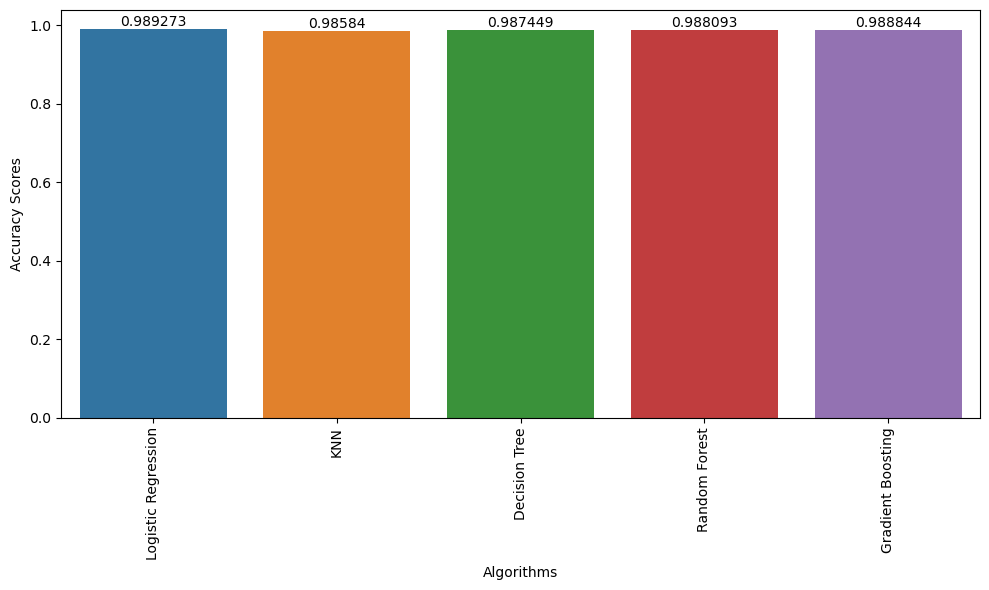

In [109]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel('Accuracy Scores')
ax = sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary

    ** After trying various models, All the models are giving an accuracy score of 98%. Indicating that all of them are the superior models.

## Conclusion

    ** In conclusion, our machine learning model utilizing all the above performed has yielded best performance in predicting RFC (Request for change) and possible failure / misconfiguration of ITSM assets, achieving an accuracy score of 98%. This score indicates that approximately 98% of the variability in the target variable, RFC (Request for change) and possible failure / misconfiguration of ITSM assets prediction, is explained by the features included in the model.

## **Challenges Faced:**

1) Empty cell present in features but not showing in isnull().sum() code , so we have to perform logic to show it into null values.

2) Given handle time hr is not understood so we create our own handle time from open time and resolve time.

3) Selecting best parameter range for Hyperparameter tuning in Decision Tree and Random Forest model for High priority Tickets and Auto Tag objectives.

4) Creating Quarterwise features with incidents from open time and Incident_ID is tricky and requires logic.

5) Creating Yearwise features with incidents from open time and Incident_ID is tricky and require logic.

-------
-------